In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Load the loan data set

In [3]:
loan_data_raw = pd.read_csv('loan.csv')
loan_data_raw.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Data Understanding / Data cleaning

In [4]:
# Calculate the percentage of missing values for each column
missing_values = loan_data_raw.isnull().mean() * 100
missing_values = missing_values[missing_values > 0]
# Filter to show only columns with missing values
missing_values.sort_values(ascending=False)

bc_open_to_buy                100.000000
acc_open_past_24mths          100.000000
bc_util                       100.000000
mo_sin_old_il_acct            100.000000
mo_sin_old_rev_tl_op          100.000000
                                 ...    
collections_12_mths_ex_med      0.140998
revol_util                      0.125891
tax_liens                       0.098195
title                           0.027696
last_credit_pull_d              0.005036
Length: 68, dtype: float64

In [5]:
# By using the above we found that there are few columns which do not have value
# checking the count of those columns
loan_data_null_columns = loan_data_raw.count() != 0
loan_data_null_columns.value_counts()


True     57
False    54
Name: count, dtype: int64

In [6]:
# By using the above we find that we have 57 columns which contains data and 54 columns which do not contain data
empty_columns = list(loan_data_raw.columns[loan_data_raw.count()==0] )
print('No.of Columns which have no data: {0}'.format(len(empty_columns) ))
print('Empty Columns :\n {0}'.format(empty_columns) )

No.of Columns which have no data: 54
Empty Columns :
 ['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_

In [7]:
# Deleting the columns from data frame
loan_data_raw.drop(empty_columns,axis=1,inplace=True)
loan_data_raw.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [8]:
#No duplicates found in the dataset
print('No. of duplicates :{0}'.format(loan_data_raw.duplicated().sum()))

No. of duplicates :0


# Data cleaning
## Fields to be removed

### 1. The field `next_pymnt_d` is 97% empty and can therefore be dropped.
### 2. `policy_code` has a single value, '1', making it redundant.
### 3. `pymnt_plan` only contains the value 'n'.
### 4. `initial_list_status` consistently holds the value 'F'.
### 5. `tax_liens` is either missing or set to zero, indicating no legal claims, so it can be removed.
### 6. `desc` cannot be validated and thus cannot be used as a measurable quantity.
### 7. `application_type` always has the value 'INDIVIDUAL', making it unnecessary.
### 8. `url` contains links that are not utilized in any calculations.
### 9. `zip_code` only captures the state, which is already available in the `addr_state` field.
### 10. `id` and `member_id` are unique for each applicant and do not provide any trend data.
### 11. Fields like `total_rec_prncp`, `total_rec_int`, `total_rec_late_fee`, `recoveries`, `collection_recovery_fee`, `last_pymnt_d`, and `last_pymnt_amnt` do not provide insight into the applicant's income as they are post-loan statistics.
### 12. `title` and `purpose` are almost identical. Since `purpose` has more discrete levels, `title` can be dropped.
### 13. `funded_amnt_inv` and `total_pymnt_inv` do not show any trends as they come into play after the loan is issued, upon the loan is started.
### 14. `sub_grade` information is already captured in the `grade` field.
### 15. `emp_title` may be useful for analysis, but it's inconclusive since there is no industry standard for employee titles.
### 16. `out_prncp_inv` and `out_prncp` are always zero when the loan is charged off, so they can be ignored. These values can also be calculated before the loan application.


In [9]:
# Removing  columns where data is less that 50% as they are not useful for analysis
null_counts = loan_data_raw.isnull().sum()

# Identify columns with nulls half of dataset
columns_to_drop = null_counts[null_counts > (loan_data_raw.shape[0]/2)].index

# Drop these columns from the DataFrame
loan_data_raw = loan_data_raw.drop(columns=columns_to_drop)

# Display the updated DataFrame
loan_data_raw.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [10]:
#"id" and "member_id" are unique hence will not help to figure our any trend/pattern and cant anyalise any risk
# Employee titles are very huge in types and require another analysis .. shall ignore for now.
remove_columns = ['id','member_id','sub_grade','emp_title','policy_code','initial_list_status','desc',
            'application_type','total_rec_prncp','total_rec_int', 'total_rec_late_fee',
             'recoveries', 'collection_recovery_fee', 'last_pymnt_d','last_pymnt_amnt','title','out_prncp_inv','out_prncp',
             'pymnt_plan','funded_amnt_inv','total_pymnt_inv','url','zip_code']
loan_data_raw=loan_data_raw.drop(remove_columns, axis=1)

In [11]:
loan_data_raw.shape

(39717, 31)

In [12]:
# Calculate the percentage of missing values for each column
missing_values = loan_data_raw.isnull().mean() * 100
missing_values = missing_values[missing_values > 0]
# Filter to show only columns with missing values
missing_values.sort_values(ascending=False)

emp_length                    2.706650
pub_rec_bankruptcies          1.754916
collections_12_mths_ex_med    0.140998
chargeoff_within_12_mths      0.140998
revol_util                    0.125891
tax_liens                     0.098195
last_credit_pull_d            0.005036
dtype: float64

In [13]:
#Almost all the values are zero ~90% not credible to use for any trends
print("tax_liens: {0} ".format((loan_data_raw.tax_liens==0).sum()/len(loan_data_raw.index)))
print("pub_rec_bankruptcies: {0} ".format((loan_data_raw.pub_rec_bankruptcies==0).sum()/len(loan_data_raw.index)))
print("delinq_amnt: {0} ".format((loan_data_raw.delinq_amnt==0).sum()/len(loan_data_raw.index)))
print("chargeoff_within_12_mths: {0} ".format((loan_data_raw.chargeoff_within_12_mths==0).sum()/len(loan_data_raw.index)))
print("acc_now_delinq: {0} ".format((loan_data_raw.acc_now_delinq==0).sum()/len(loan_data_raw.index)))
print("collections_12_mths_ex_med: {0} ".format((loan_data_raw.collections_12_mths_ex_med==0).sum()/len(loan_data_raw.index)))
print("pub_rec: {0} ".format((loan_data_raw.pub_rec==0).sum()/len(loan_data_raw.index)))  #%95 is zero not enough to calculate any pattern

non_credible_columns =['tax_liens','pub_rec_bankruptcies','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq',\
                          'collections_12_mths_ex_med','pub_rec']
loan_data_raw = loan_data_raw.drop(non_credible_columns,axis=1)
print("Shape after deleting the columns which contain ~90% and more single Value:")
loan_data_raw.shape

tax_liens: 0.9990180527230154 
pub_rec_bankruptcies: 0.9401263942392426 
delinq_amnt: 1.0 
chargeoff_within_12_mths: 0.9985900244227912 
acc_now_delinq: 1.0 
collections_12_mths_ex_med: 0.9985900244227912 
pub_rec: 0.9467230656897551 
Shape after deleting the columns which contain ~90% and more single Value:


(39717, 24)

In [14]:
#Also you can see now less then 1 percent of values are missing .. we can remove all the missing values.
loan_data_raw= loan_data_raw.dropna()
loan_data_cleaned = loan_data_raw
print("Shape after deleting the rows for which certain values are missing (<1% column values are missing)")
loan_data_cleaned.shape


Shape after deleting the rows for which certain values are missing (<1% column values are missing)


(38593, 24)

# Data Correction /Transformation / Derived Metrics

In [15]:
# Verifying the home_ownership columns
loan_data_cleaned.home_ownership.value_counts()

home_ownership
RENT        18456
MORTGAGE    17202
OWN          2836
OTHER          96
NONE            3
Name: count, dtype: int64

In [16]:
# dropping the rows whose home_ownership value is NONE
loan_data_cleaned = loan_data_cleaned[loan_data_cleaned.home_ownership != 'NONE']
loan_data_cleaned.home_ownership.value_counts()

home_ownership
RENT        18456
MORTGAGE    17202
OWN          2836
OTHER          96
Name: count, dtype: int64

In [17]:
loan_data_cleaned.select_dtypes('object').columns

Index(['term', 'int_rate', 'grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'earliest_cr_line', 'revol_util', 'last_credit_pull_d'],
      dtype='object')

`int_rate` , `issue_d` ,`earliest_cr_line` can be coverted to  date object

In [18]:
# correct Interest Rate removing the '%'
loan_data_cleaned['int_rate'] = loan_data_cleaned.int_rate.apply(lambda x: x[:-1])
# convert to float
loan_data_cleaned['int_rate'] = loan_data_cleaned['int_rate'].apply(lambda x : float(x))
loan_data_cleaned.int_rate.head(5)

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

In [19]:
# perform same calculation for the revol_util
# correct Interest Rate removing the '%'
loan_data_cleaned['revol_util'] = loan_data_cleaned.revol_util.apply(lambda x: x[:-1])
# convert to float
loan_data_cleaned['revol_util'] = loan_data_cleaned['revol_util'].apply(lambda x : float(x))
loan_data_cleaned.revol_util.head(5)

0    83.7
1     9.4
2    98.5
3    21.0
4    53.9
Name: revol_util, dtype: float64

In [20]:
#Extracting years from the loan issue month and year
loan_data_cleaned['issue_year']=pd.to_datetime(loan_data_cleaned.issue_d , format = '%b-%y').apply(lambda x: x.year)
loan_data_cleaned.issue_year.unique()
loan_data_cleaned['issue_month']=pd.to_datetime(loan_data_cleaned.issue_d , format = '%b-%y').apply(lambda x: x.month)
loan_data_cleaned.issue_month.unique()
print(loan_data_cleaned.issue_year.value_counts())
print(loan_data_cleaned.issue_month.value_counts())

issue_year
2011    20892
2010    11195
2009     4702
2008     1553
2007      248
Name: count, dtype: int64
issue_month
12    4328
11    4040
10    3797
9     3540
8     3437
7     3367
6     3182
5     2916
4     2757
3     2625
1     2325
2     2276
Name: count, dtype: int64


In [21]:
# As we noticed that for year 2002 there are only 5 records hence we can ignore it.
loan_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38590 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38590 non-null  int64  
 1   funded_amnt          38590 non-null  int64  
 2   term                 38590 non-null  object 
 3   int_rate             38590 non-null  float64
 4   installment          38590 non-null  float64
 5   grade                38590 non-null  object 
 6   emp_length           38590 non-null  object 
 7   home_ownership       38590 non-null  object 
 8   annual_inc           38590 non-null  float64
 9   verification_status  38590 non-null  object 
 10  issue_d              38590 non-null  object 
 11  loan_status          38590 non-null  object 
 12  purpose              38590 non-null  object 
 13  addr_state           38590 non-null  object 
 14  dti                  38590 non-null  float64
 15  delinq_2yrs          38590 non-null  int6

# Derived Metrics

In [22]:
loan_data_cleaned.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'revol_bal',
       'revol_util', 'total_acc', 'total_pymnt', 'last_credit_pull_d',
       'issue_year', 'issue_month'],
      dtype='object')

In [23]:
# droping the rows where the value of loans status equal to Current
loan_data_cleaned = loan_data_cleaned[loan_data_cleaned.loan_status != 'Current']
loan_data_cleaned.loan_status.value_counts()

loan_status
Fully Paid     32109
Charged Off     5383
Name: count, dtype: int64

In [24]:
# verifying the loan status unique values
loan_data_cleaned.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [25]:
#Dropping issue_d as we dont need month for any calculation
#"last_credit_pull_d" again will not be able to predict before loan starts
loan_data_cleaned = loan_data_cleaned.drop(['issue_d','last_credit_pull_d','earliest_cr_line'], axis=1)
loan_data_cleaned.head(4)

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,...,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,total_pymnt,issue_year,issue_month
0,5000,5000,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,...,27.65,0,1,3,13648,83.7,9,5863.155187,2011,12
1,2500,2500,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,...,1.00,0,5,3,1687,9.4,4,1008.710000,2011,12
2,2400,2400,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,...,8.72,0,2,2,2956,98.5,10,3005.666844,2011,12
3,10000,10000,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,...,20.00,0,1,10,5598,21.0,37,12231.890000,2011,12


In [26]:
# Create loan amount categories for more detailed analysis.
loan_data_cleaned['loan_amnt_bin'] = pd.cut(loan_data_cleaned['loan_amnt'],
                                            [0, 7000, 14000, 21000, 28000, 35000],
                                            labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# Group annual income into categories for further analysis.
loan_data_cleaned['annual_inc_bin'] = pd.cut(loan_data_cleaned['annual_inc'],
                                            [0, 20000, 40000, 60000, 80000,1000000],
                                            labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# Categorize interest rates for subsequent bivariate analysis.
loan_data_cleaned['int_rate_bin'] = pd.cut(loan_data_cleaned['int_rate'],
                                          [5, 10, 15, 20],
                                           labels=['5-10', '10-15', '15-20'])


# Divide debt-to-income ratio into categories for bivariate analysis.
loan_data_cleaned['dti_bin'] = pd.cut(loan_data_cleaned['dti'],
                                      [0, 5, 10, 15, 20, 25, 30],
                                      labels=['0-5', '05-10', '10-15', '15-20', '20-25','25-30'])


In [27]:
loan_data_cleaned['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years'],
      dtype=object)

In [28]:
def formatZeroYearExperience(x):
    returnVal=x;
    if(returnVal == '< 1 year'):
        return '0'
    return returnVal;

#convert employee length to numeric for <1 year experience values
loan_data_cleaned.emp_length=loan_data_cleaned.emp_length.apply(lambda x: formatZeroYearExperience(x))

In [29]:
# Converting employee length to numeric value for other values eg['10+ years', '1 year', '3 years', '8 years', '9 years', '4 years', '5 years', '6 years', '2 years', '7 years']
loan_data_cleaned['emp_length'] = loan_data_cleaned['emp_length'].str.extract('(\d+)').astype(int)

In [30]:
# Verifying all the unique values are in integer
loan_data_cleaned['emp_length'].unique()

array([10,  0,  3,  8,  9,  4,  5,  1,  6,  2,  7])

In [31]:
#This seems to be a final cleaned class.
loan_data_cleaned.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,...,revol_bal,revol_util,total_acc,total_pymnt,issue_year,issue_month,loan_amnt_bin,annual_inc_bin,int_rate_bin,dti_bin
0,5000,5000,36 months,10.65,162.87,B,10,RENT,24000.0,Verified,...,13648,83.7,9,5863.155187,2011,12,0-7000,20000-40000,10-15,25-30
1,2500,2500,60 months,15.27,59.83,C,0,RENT,30000.0,Source Verified,...,1687,9.4,4,1008.710000,2011,12,0-7000,20000-40000,15-20,0-5
2,2400,2400,36 months,15.96,84.33,C,10,RENT,12252.0,Not Verified,...,2956,98.5,10,3005.666844,2011,12,0-7000,0-20000,15-20,05-10
3,10000,10000,36 months,13.49,339.31,C,10,RENT,49200.0,Source Verified,...,5598,21.0,37,12231.890000,2011,12,7000-14000,40000-60000,10-15,15-20
5,5000,5000,36 months,7.90,156.46,A,3,RENT,36000.0,Source Verified,...,7963,28.3,12,5632.210000,2011,12,0-7000,20000-40000,5-10,10-15


### Borrowers count by experience level

In [32]:
loan_data_cleaned.emp_length.value_counts().sort_values(ascending=False)

emp_length
10    8487
0     4493
2     4286
3     4008
4     3335
5     3188
1     3163
6     2165
7     1708
8     1433
9     1226
Name: count, dtype: int64

In [33]:
loan_data = loan_data_cleaned
loan_data.shape

(37492, 27)

# Outlier treatment

<Axes: >

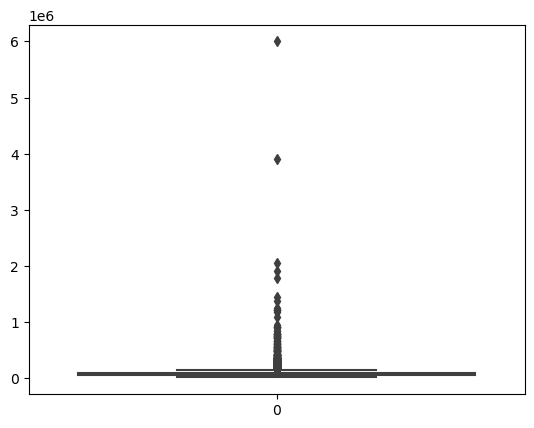

In [34]:
#analyse outliers in annual_inc using boxplot
sns.boxplot(loan_data_cleaned['annual_inc'])

In [35]:
# By the box plot it is evident that we should remove the outliers from analysis
# we can get more information on the annual income
loan_data_cleaned.annual_inc.describe()

count    3.749200e+04
mean     6.943357e+04
std      6.467454e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [36]:
# Numerical summary
print('90% Data', loan_data_cleaned['annual_inc'].quantile(0.9))
print('99% Data:', loan_data_cleaned['annual_inc'].quantile(0.99))
print('100% Data:', loan_data_cleaned['annual_inc'].quantile(1))

90% Data 116697.60000000003
99% Data: 235000.0
100% Data: 6000000.0


In [37]:
# we will remove the outliers of 95 percent to check test the accuracy of the plot
loan_data_cleaned = loan_data_cleaned [loan_data_cleaned.annual_inc <= loan_data_cleaned['annual_inc'].quantile(0.95)]

<Axes: >

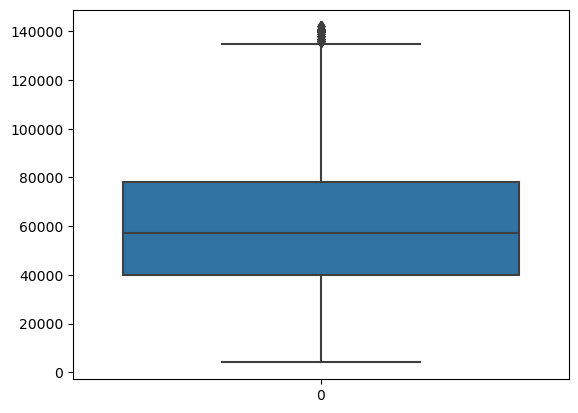

In [38]:
# Now verifying the box plot for annual_inc
sns.boxplot(loan_data_cleaned['annual_inc'])

In [39]:
loan_data_cleaned.shape

(35625, 27)

In [40]:
loan_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35625 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   loan_amnt            35625 non-null  int64   
 1   funded_amnt          35625 non-null  int64   
 2   term                 35625 non-null  object  
 3   int_rate             35625 non-null  float64 
 4   installment          35625 non-null  float64 
 5   grade                35625 non-null  object  
 6   emp_length           35625 non-null  int32   
 7   home_ownership       35625 non-null  object  
 8   annual_inc           35625 non-null  float64 
 9   verification_status  35625 non-null  object  
 10  loan_status          35625 non-null  object  
 11  purpose              35625 non-null  object  
 12  addr_state           35625 non-null  object  
 13  dti                  35625 non-null  float64 
 14  delinq_2yrs          35625 non-null  int64   
 15  inq_last_6mths       356

# EDA
## Univaraiate Analysis


In [41]:
plt.style.use('bmh')

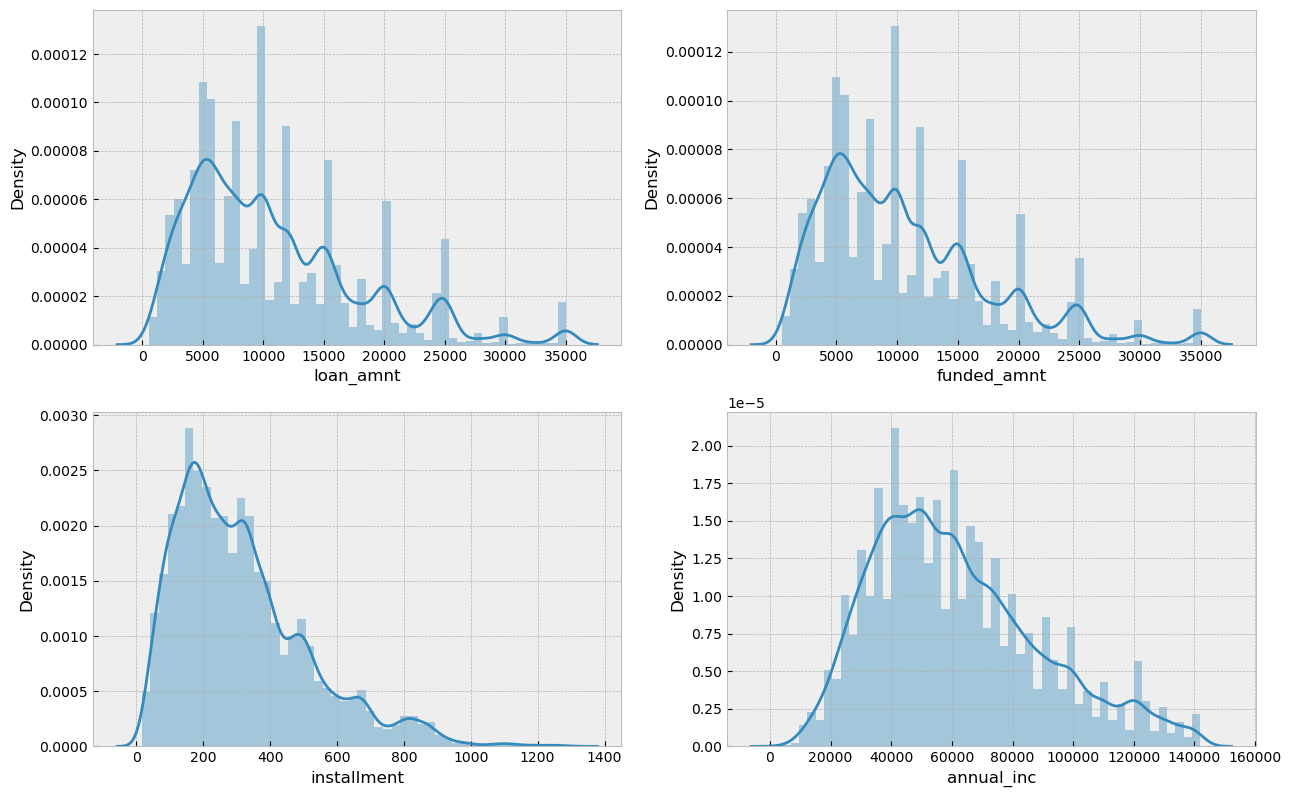

In [42]:
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.distplot(loan_data_cleaned['loan_amnt'])
plt.subplot(4,2,2)
sns.distplot(loan_data_cleaned['funded_amnt'])
plt.subplot(4,2,3)
sns.distplot(loan_data_cleaned['installment'])
plt.subplot(4,2,4)
sns.distplot(loan_data_cleaned['annual_inc'])
plt.show()

##### Observations
- Based on the analysis, the distribution of amounts appears to be quite similar, making loan_amnt a suitable variable for further analysis.

## Categorical variables are mentioned below to enable us to see its trend.
##  `term` , `grade`,`home_ownership`,`verification_status`, `loan_status`,`purpose`,`addr_state`


## Lets analyse the categorical behavior

In [43]:
loan_data_cleaned.loan_status.value_counts()

loan_status
Fully Paid     30445
Charged Off     5180
Name: count, dtype: int64

### Percentage of loan status in existing data set.

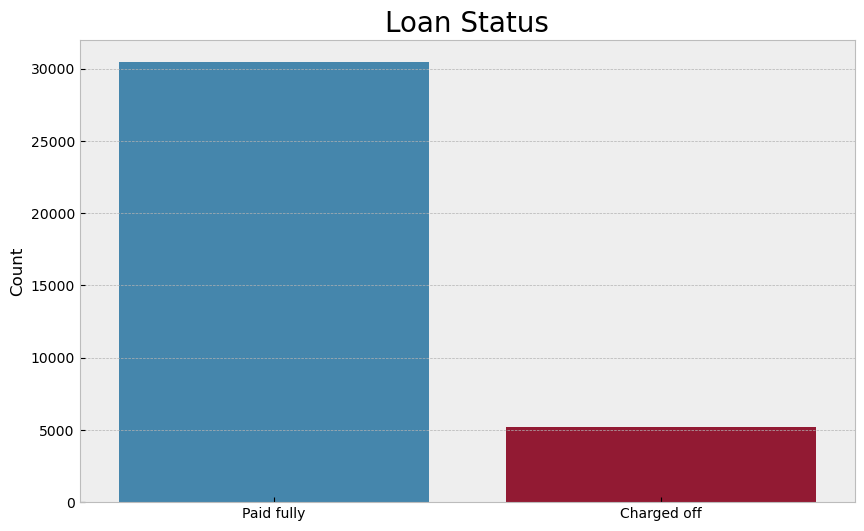

In [44]:

plt.figure(figsize=(10, 6))
sns.countplot(data=loan_data_cleaned, x='loan_status')
plt.xlabel("")
plt.ylabel("Count")
plt.title("Loan Status", y=1, fontdict={"fontsize": 20})

# Custom x-ticks labels (if needed, ensure the order matches the data)
plt.xticks(ticks=[0, 1], labels=["Paid fully", "Charged off"])

# Show the plot
plt.show()

### Observation
* The loan status data shows that a majority of the loans, approximately 85.7%, have been fully paid off. In contrast, around 14.3% of the loans have been charged off, indicating a default. The number of loans that are currently active is minimal compared to the other two categories.




In [45]:
# # interest rate increases with grade A->G
# # "subgrade" will also give the same value we can ignore it.
# # loan_data[loan_data.grade =='G'].int_rate.mean()
# # loan_data.groupby(by='grade').mean().int_rate.sort_values(ascending=False)
# mean_int_rate_g = loan_data[loan_data['grade'] == 'G']['int_rate'].mean()
# print(f"Mean Interest Rate for Grade G: {mean_int_rate_g}")

# # Group by 'grade' and calculate the mean interest rate, then sort in descending order
# sorted_mean_int_rate = loan_data.groupby(by='grade')['int_rate'].mean().sort_values(ascending=False)
# print("Sorted Mean Interest Rates by Grade:")
# print(sorted_mean_int_rate)

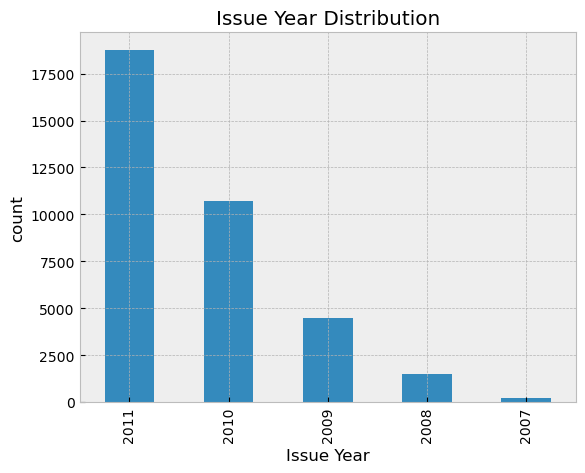

In [46]:
#converting value_count into percentage
ls = loan_data_cleaned["issue_year"].value_counts()
#barplot
ls.plot(kind='bar')
plt.xlabel("Issue Year")
plt.ylabel('count')
plt.title('Issue Year Distribution')
plt.show()


### Observation


*   The yearly data indicates that Lending Club has seen significant growth over time, with the number of loans issued doubling each year, reflecting the platform's rapid expansion.



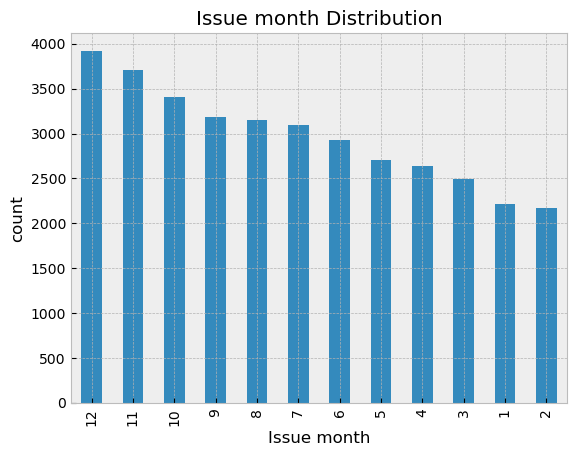

In [47]:
#ploting the charrt based on the issue month column
ls = loan_data_cleaned["issue_month"].value_counts()
ls.plot(kind='bar')
plt.xlabel("Issue month")
plt.ylabel('count')
plt.title('Issue month Distribution')
plt.show()

### Observation
*   The data on loan issue months suggests a trend of increasing loan issuance from January through December, with a noticeable spike in the final quarter, likely due to the holiday season.

In [48]:
# Analysing the home_ownership column
loan_data_cleaned.home_ownership.value_counts()

home_ownership
RENT        17607
MORTGAGE    15280
OWN          2647
OTHER          91
Name: count, dtype: int64

<Figure size 1500x500 with 0 Axes>

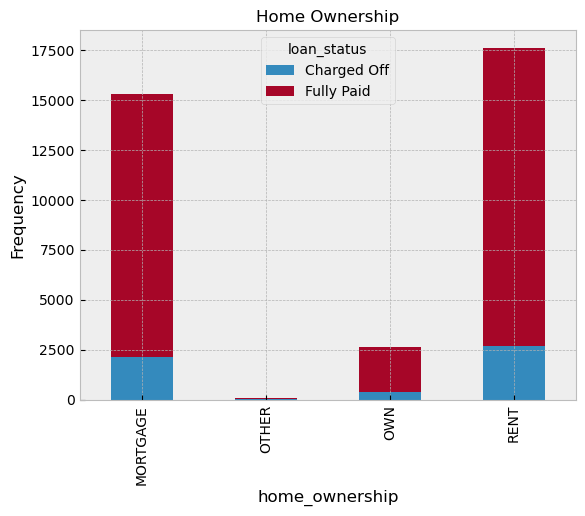

In [49]:
plt.figure(figsize=(15,5))
loan_data_cleaned.groupby('home_ownership')['loan_status'].value_counts().unstack().plot(kind='bar',stacked=True)
plt.title("Home Ownership",fontdict={'fontsize':12})
plt.xlabel("home_ownership")
plt.ylabel("Frequency")
plt.show()

### Observation


*   Borrowers with mortgages or those renting appear more prone to financial challenges that result in charged-off loans, whereas those who own their homes outright tend to have a lower likelihood of defaulting.



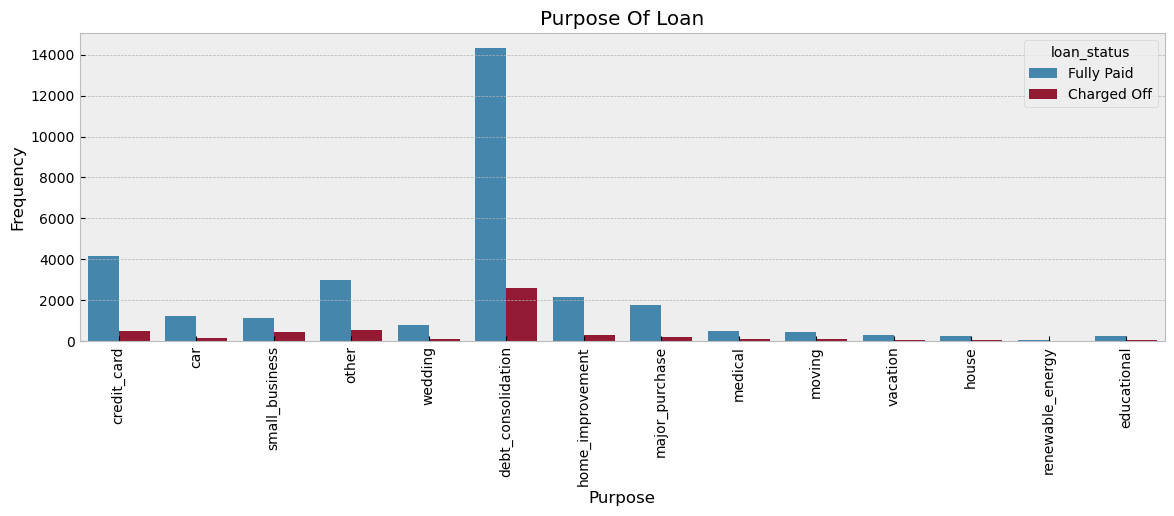

In [50]:
plt.figure(figsize=(14,4))
ax = sns.countplot(x="purpose", data=loan_data_cleaned, hue= 'loan_status')
ax.set_title('Purpose Of Loan')
ax.set_ylabel('Frequency')
ax.set_xlabel('Purpose')
plt.xticks(rotation=90)
plt.show()

### Observation
* Analysis of the data indicates that a significant portion of the loans were taken out for purposes such as consolidating debt and settling credit card bills.
* The "Charged Off" loan status appears to be notably prevalent among loans used for debt consolidation.

#### Analyzing Loan paying term

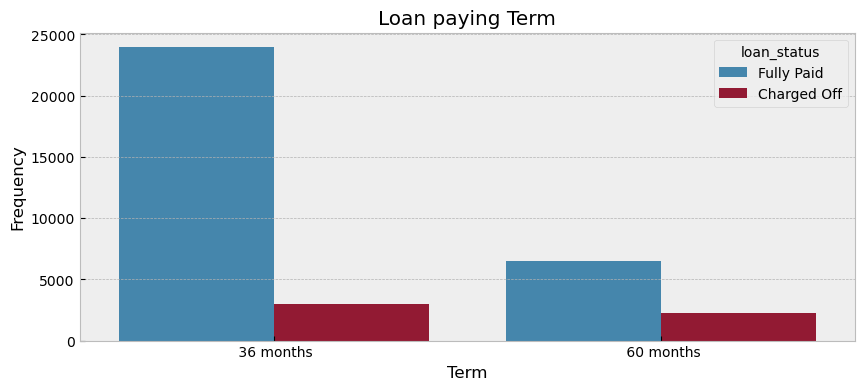

In [51]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x="term", data=loan_data_cleaned, hue= 'loan_status')
ax.set_title('Loan paying Term')
ax.set_ylabel('Frequency')
ax.set_xlabel('Term')
plt.show()

### Observations
* Analysis of the term data reveals that the majority of loans are for a 36-month duration rather than a 60-month term.
* The incidence of "Charged Off" loan status is higher for loans with a 60-month term compared to those with a 36-month term.

# Segmented Univariate Analysis

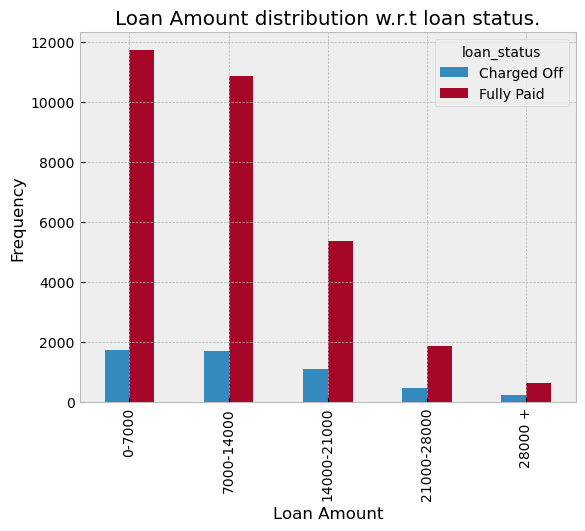

In [52]:
#
loan_data_cleaned.groupby('loan_amnt_bin')['loan_status'].value_counts().unstack().plot(kind='bar')
plt.title("Loan Amount distribution w.r.t loan status.")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

### Observations
- The data suggests that borrowers who take out loan amounts below 14,000 are more common, and the rate of "Charged Off" status is also higher for these amounts.

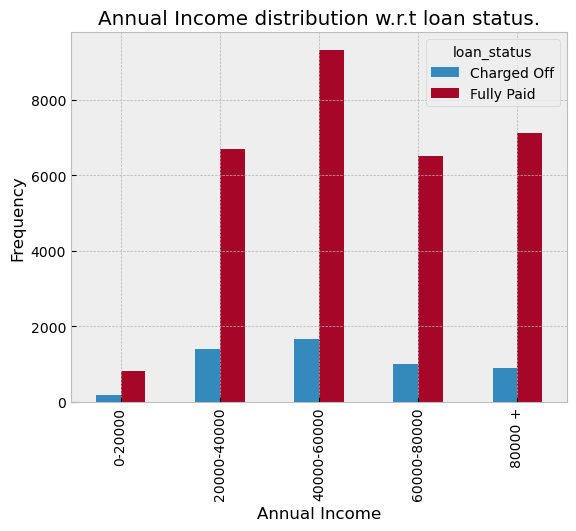

In [53]:
loan_data_cleaned.groupby('annual_inc_bin')['loan_status'].value_counts().unstack().plot(kind='bar')
plt.title("Annual Income distribution w.r.t loan status.")
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.show()

### Observations
- The chart indicates that the majority of borrowers have an annual income between 40,000  and  60,000.

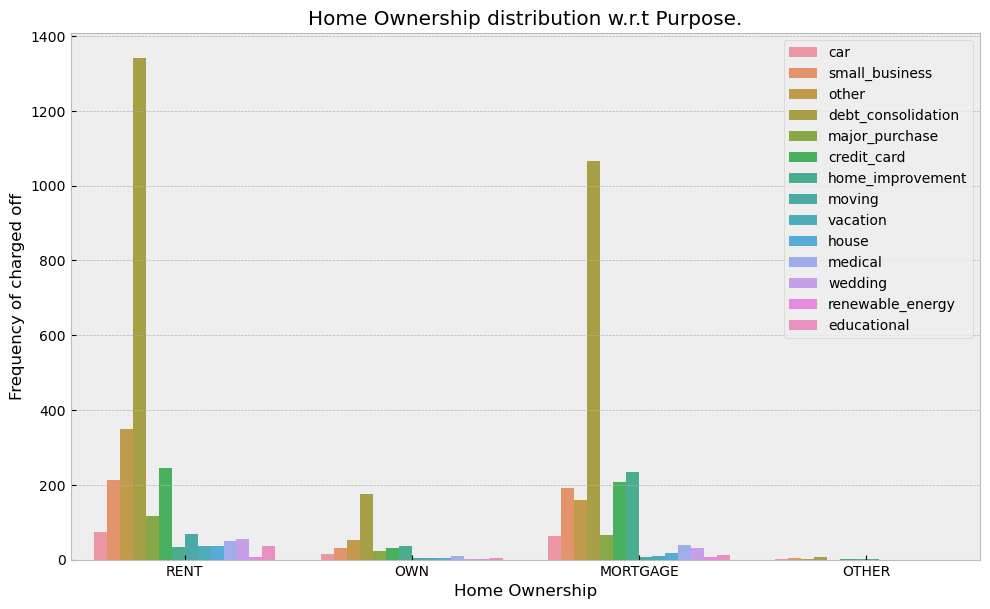

In [54]:
#home ownership and loan purpose for defaulted
plt.figure(figsize=(10,6))
sns.countplot(x='home_ownership',hue= 'purpose',data=loan_data_cleaned[loan_data_cleaned['loan_status']=='Charged Off'])
plt.tight_layout()
plt.title("Home Ownership distribution w.r.t Purpose.")
plt.xlabel("Home Ownership")
plt.ylabel("Frequency of charged off")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

### Observations
- The chart shows that borrowers who took out loans for debt consolidation have the highest number of "Charged Off" statuses. Additionally, those who are renting are the most affected.

# Bivariate Analysis

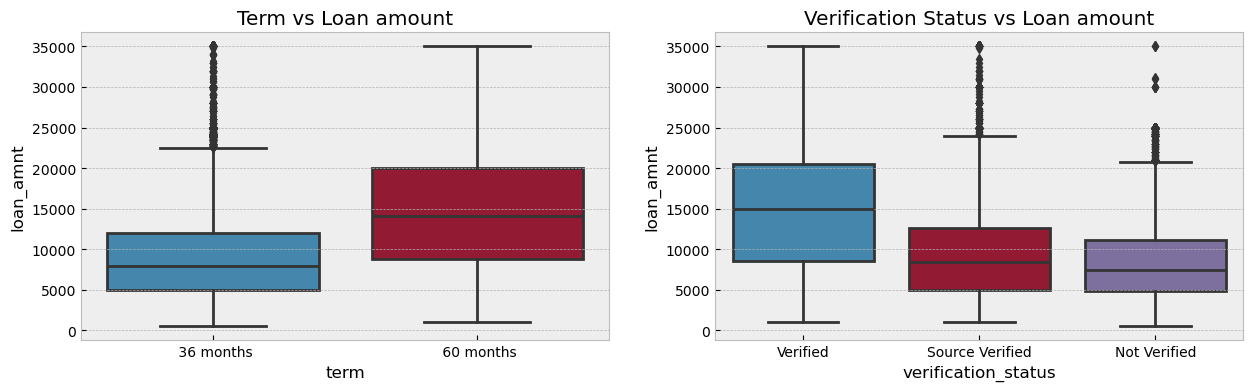

In [55]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="term", y="loan_amnt", data=loan_data_cleaned)
plt.title("Term vs Loan amount")
plt.subplot(1,2,2)
sns.boxplot(x="verification_status", y="loan_amnt", data=loan_data_cleaned)
plt.title("Verification Status vs Loan amount")
plt.show()

### Observations
- Analysis of loan amount versus term indicates that larger loan amounts are typically associated with longer terms, such as 60 months. The median loan amount for a 60-month term is around 15,000, whereas for a 36-month term, it is about 8,000.
- Regarding verification status and loan amount, verified borrowers tend to receive higher loan amounts compared to non-verified and source-verified borrowers. Notably, all loans exceeding 10,000 are associated with verified borrowers.

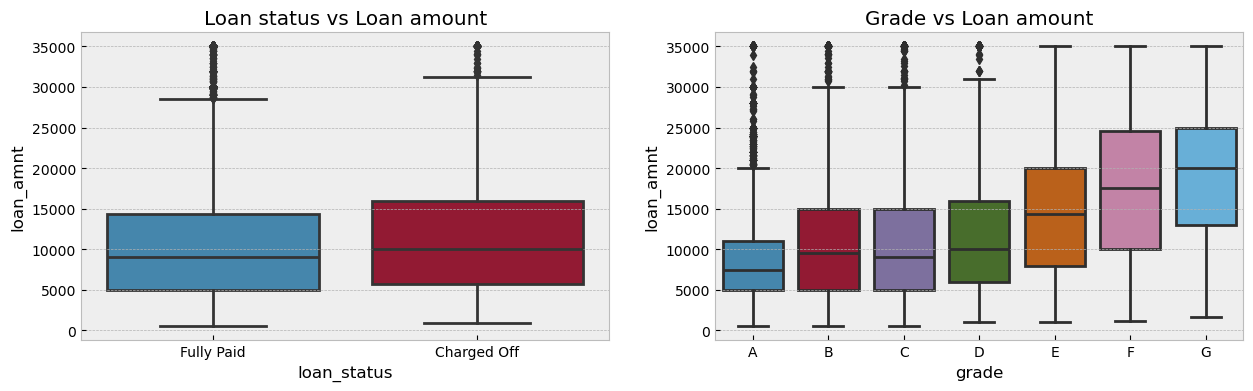

In [56]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="loan_status", y="loan_amnt", data=loan_data_cleaned)
plt.title("Loan status vs Loan amount")
plt.subplot(1,2,2)
#arranging grade in alphabetically ascending order
grade_order = loan_data_cleaned["grade"].unique()
grade_order.sort()
sns.boxplot(x="grade", y="loan_amnt", order= grade_order, data=loan_data_cleaned)
plt.title("Grade vs Loan amount")
plt.show()

### observation
- When comparing loan amount with loan status, it is evident that "Charged Off" loans tend to have higher amounts than "Fully Paid" loans.
- Analysis of loan amount by grade shows that grades F and G are associated with the highest loan amounts, with loan amounts increasing as the grade decreases.
- This suggests that a higher grade is linked to a greater risk of default.

Text(0.5, 1.0, 'Home Ownership vs Loan amount')

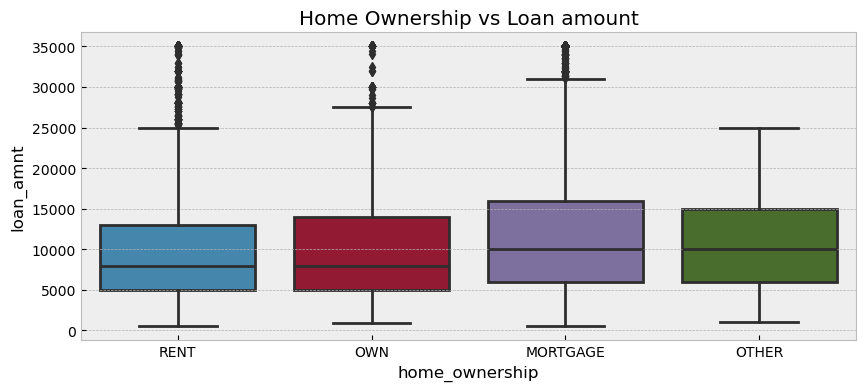

In [57]:
plt.figure(figsize=(10,4))
sns.boxplot(x="home_ownership", y="loan_amnt", data=loan_data_cleaned)
plt.title("Home Ownership vs Loan amount")

### Observation
- When examining loan amount in relation to home ownership, it is observed that borrowers with a mortgage tend to take out higher loan amounts compared to those with other types of home ownership.


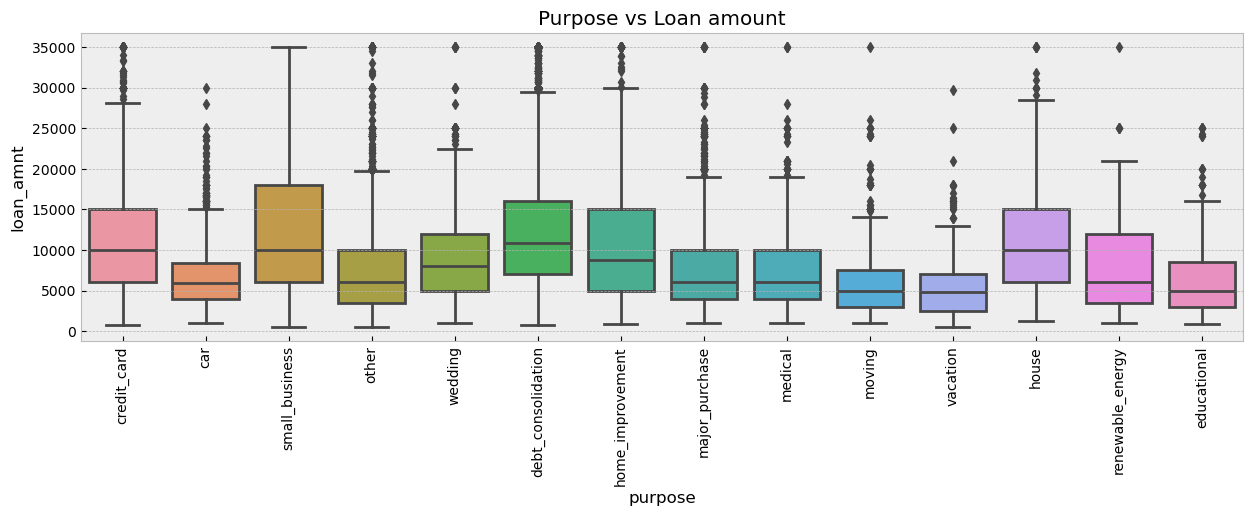

In [58]:
plt.figure(figsize=(15,4))
sns.boxplot(x="purpose", y="loan_amnt", data=loan_data_cleaned)
plt.title("Purpose vs Loan amount")
plt.xticks(rotation=90)
plt.show()

### Observations
- Analyzing loan amount by purpose reveals that borrowers seeking loans to start a small business tend to take out higher amounts compared to other purposes, with debt consolidation coming next.

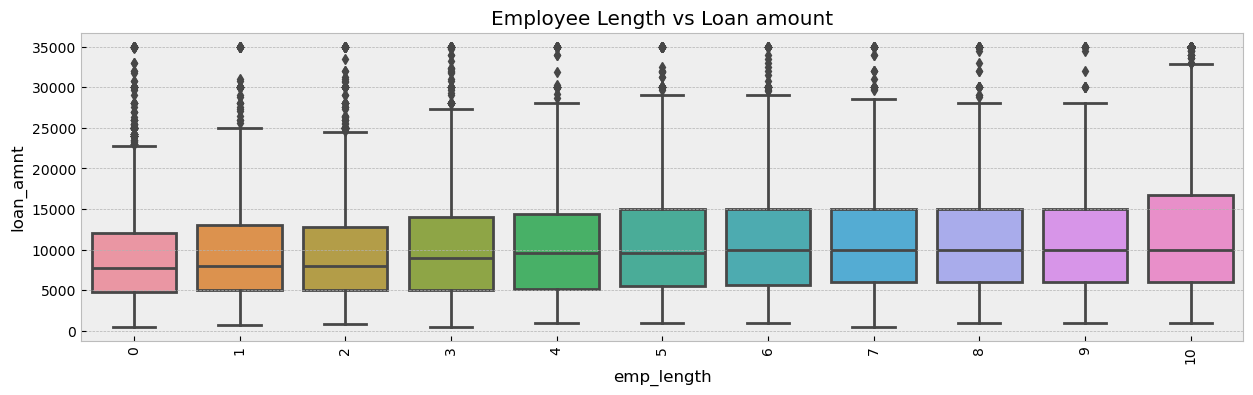

In [59]:
plt.figure(figsize=(15,4))
sns.boxplot(x="emp_length", y="loan_amnt", data=loan_data_cleaned)
plt.title("Employee Length vs Loan amount")
plt.xticks(rotation=90)
plt.show()

### Observation
- In loan amount vs employee length variable we can say that, the borrower who has 10+ years of experience are taking high amount of loan than others and borrowers with less than 1 year of experience are taking lesser amount of loan compared to others.

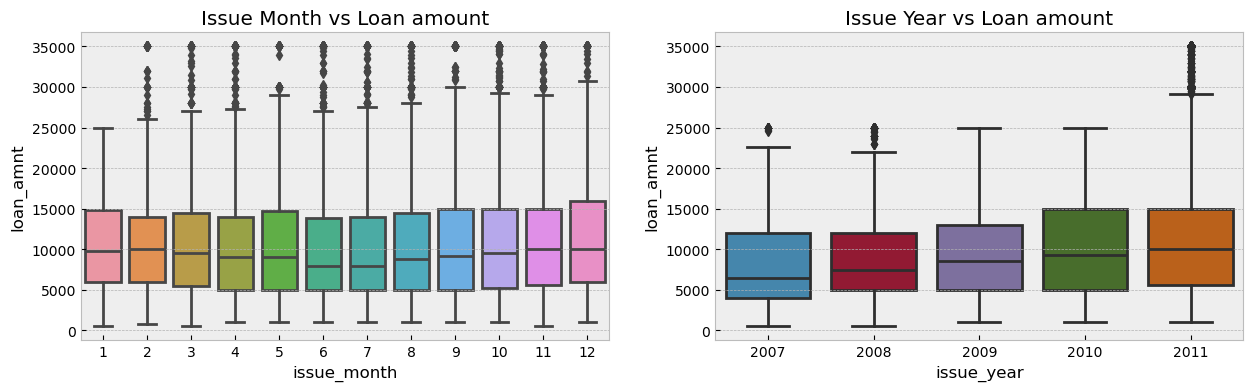

In [60]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="issue_month", y="loan_amnt", data=loan_data_cleaned)
plt.title("Issue Month vs Loan amount")
plt.subplot(1,2,2)
sns.boxplot(x="issue_year", y="loan_amnt", data=loan_data_cleaned)
plt.title("Issue Year vs Loan amount")
plt.show()

### observation
- In the analysis of loan amount by issue month, it is noted that the highest loan amounts occur in December and May, although the median loan amount remains relatively stable.
- Regarding issue year and loan amount, the highest loan amounts are observed in 2008 and 2011, with some borrowers contributing to the outliers. The median loan amount remains fairly consistent, but there is a trend of increasing loan amounts as the years progress.

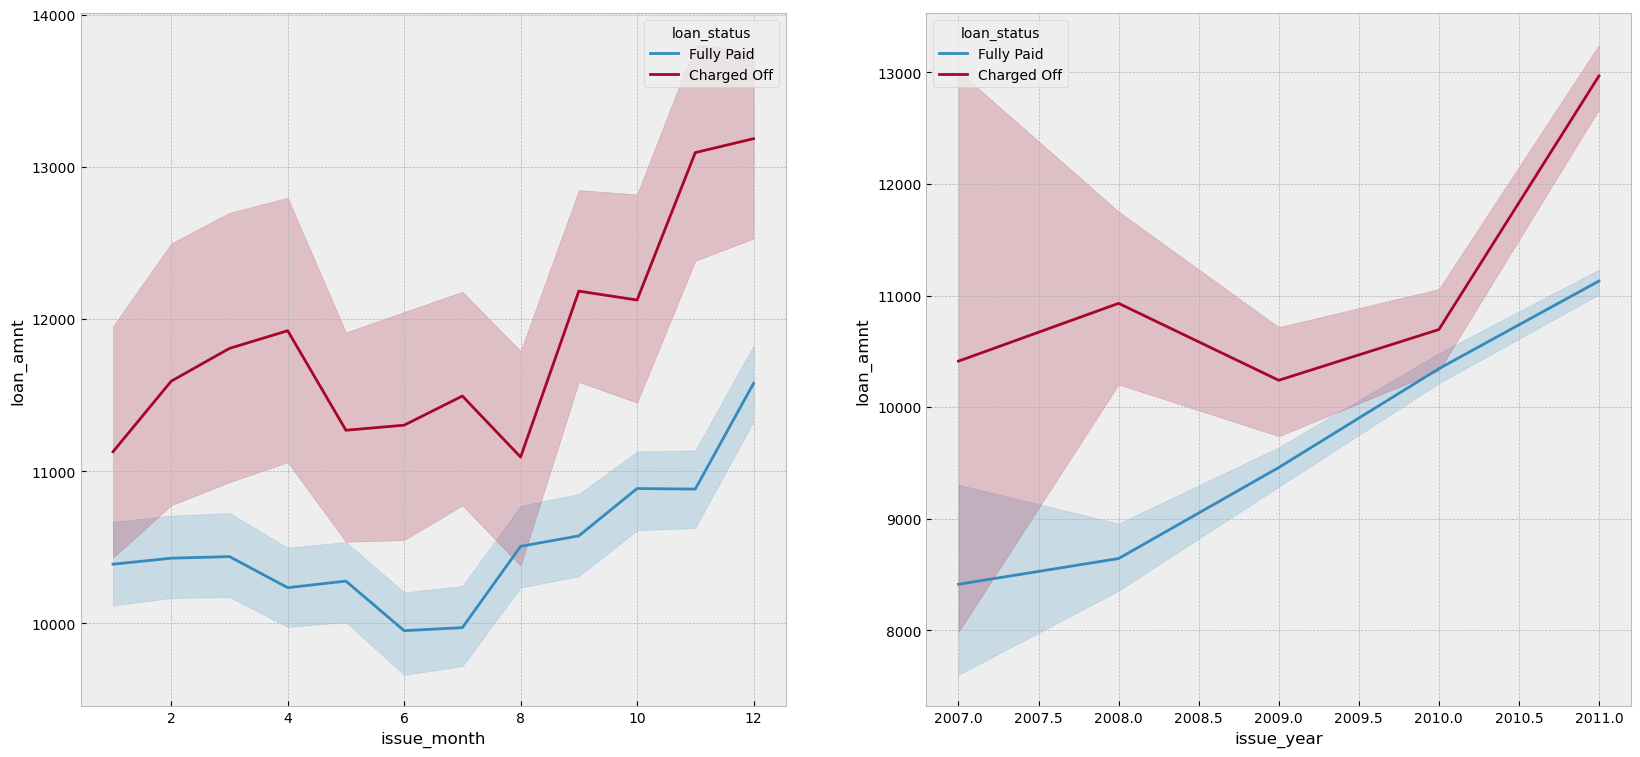

In [61]:
plt.figure(figsize=(20,9))
plt.subplot(121)
sns.lineplot(data =loan_data_cleaned ,y='loan_amnt', x='issue_month', hue ='loan_status')
plt.subplot(122)
sns.lineplot(data =loan_data_cleaned ,y='loan_amnt', x='issue_year', hue ='loan_status')
plt.show()

### Observation
- The line plot indicates that higher loan amounts are associated with a greater frequency of "Charged Off" statuses.
- Borrowers who took out loans in November and December have the highest charged-off ratios, with these months also showing the highest loan amounts.

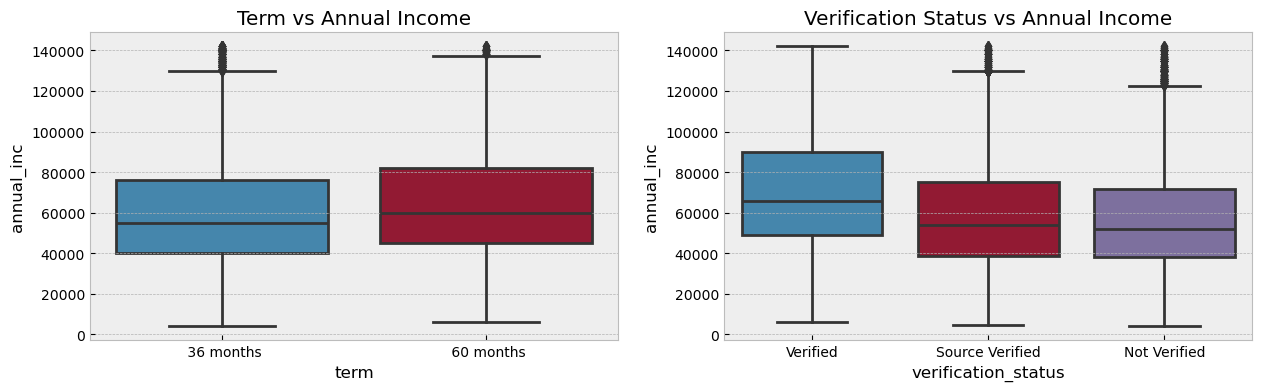

In [62]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="term", y="annual_inc", data=loan_data_cleaned)
plt.title("Term vs Annual Income")
plt.subplot(1,2,2)
sns.boxplot(x="verification_status", y="annual_inc", data=loan_data_cleaned)
plt.title("Verification Status vs Annual Income")
plt.show()

### Observations
- Analysis of term versus annual income reveals that borrowers with higher annual incomes tend to choose longer loan terms, such as 60 months, compared to those with 36-month terms.
- In terms of verification status and annual income, verified borrowers generally have higher annual incomes compared to non-verified borrowers.

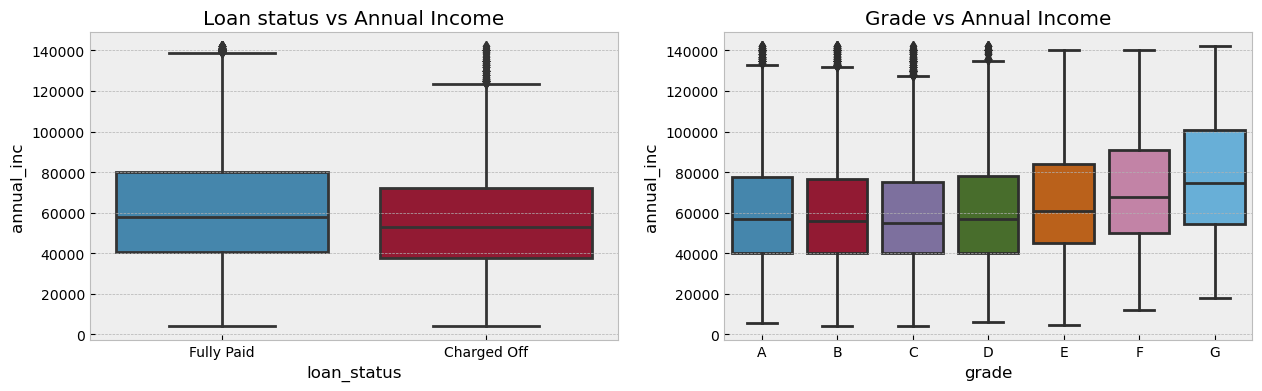

In [63]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="loan_status", y="annual_inc", data=loan_data_cleaned)
plt.title("Loan status vs Annual Income")
plt.subplot(1,2,2)
#arranging grade in alphabetically ascending order
grade_order = loan_data_cleaned["grade"].unique()
grade_order.sort()
sns.boxplot(x="grade", y="annual_inc", order= grade_order, data=loan_data_cleaned)
plt.title("Grade vs Annual Income")
plt.show()

### Observation
- The analysis of loan amount versus term indicates that larger loan amounts are associated with longer loan terms, such as 60 months. The median loan amount for a 60-month term is 15,000, compared to 8,000 for a 36-month term.
- Regarding verification status and loan amount, verified borrowers typically receive higher loan amounts compared to non-verified and source-verified borrowers. Specifically, all loans exceeding 10,000 are associated with verified borrowers.

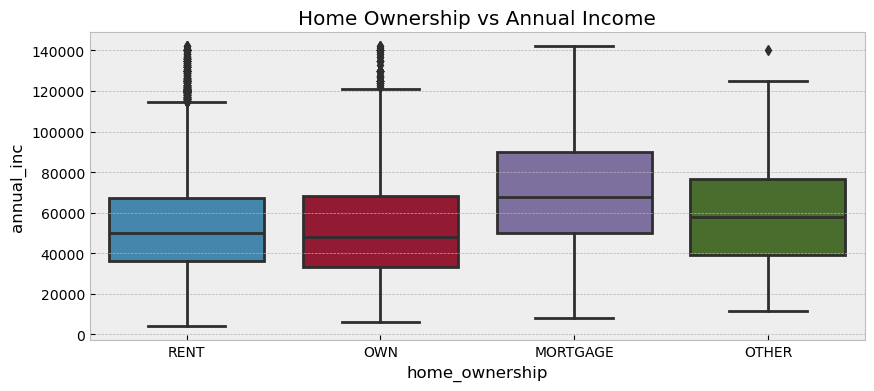

In [64]:
plt.figure(figsize=(10,4))
sns.boxplot(x="home_ownership", y="annual_inc", data=loan_data_cleaned)
plt.title("Home Ownership vs Annual Income")
plt.show()

### observation
- Analysis of annual income versus home ownership shows that borrowers with a mortgage tend to have higher annual incomes compared to those with other home ownership statuses.

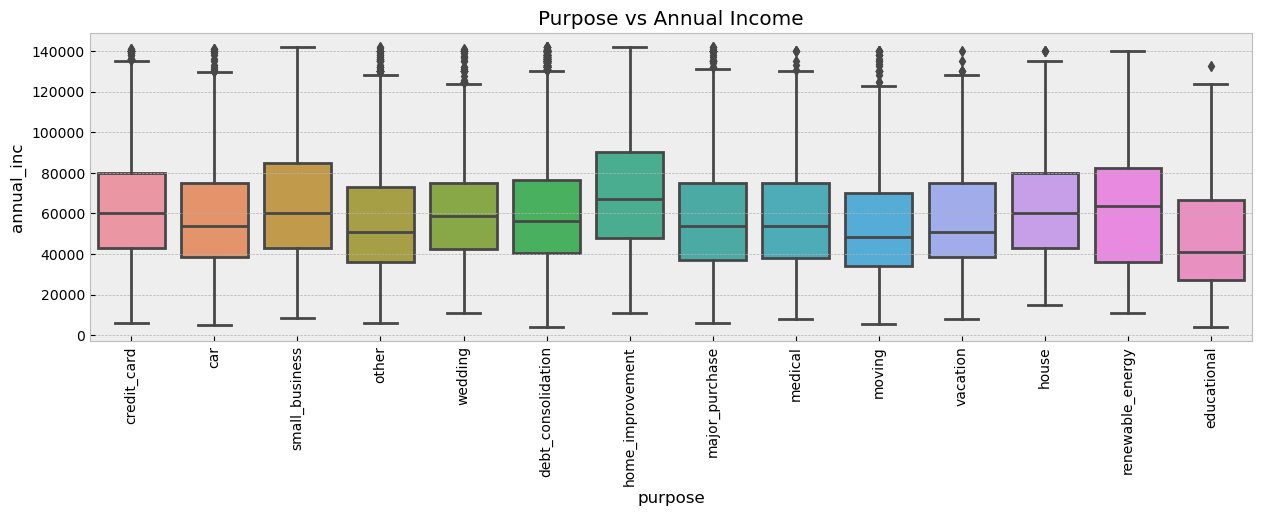

In [65]:
plt.figure(figsize=(15,4))
sns.boxplot(x="purpose", y="annual_inc", data=loan_data_cleaned)
plt.title("Purpose vs Annual Income")
plt.xticks(rotation=90)
plt.show()

### Observation
- Examining annual income versus loan purpose reveals that borrowers with higher annual incomes primarily take out loans for home improvement and starting small businesses.

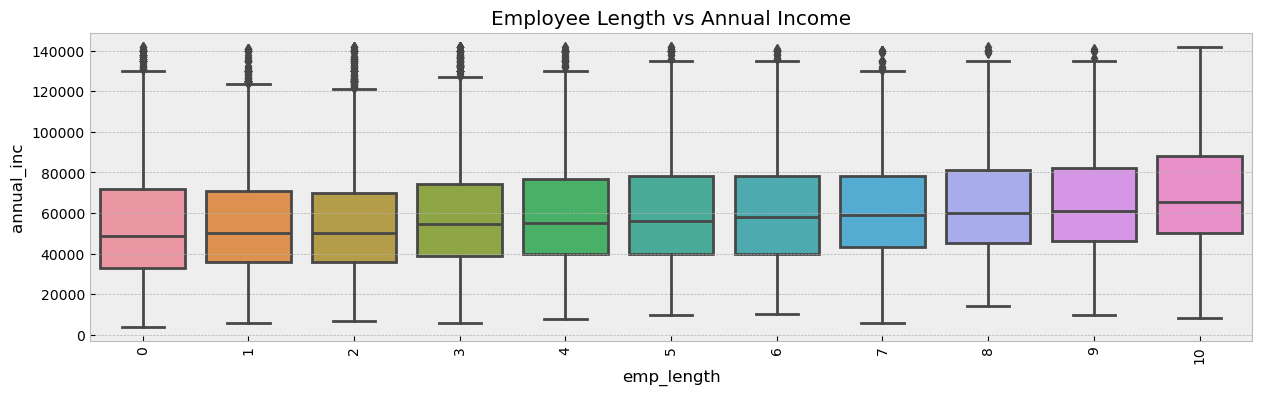

In [66]:
plt.figure(figsize=(15,4))
sns.boxplot(x="emp_length", y="annual_inc", data=loan_data_cleaned)
plt.title("Employee Length vs Annual Income")
plt.xticks(rotation=90)
plt.show()

### Observation
- Analysis of annual income versus employee length indicates that borrowers with over 10 years of experience tend to have the highest annual incomes, while those with less than 1 year of experience have the lowest incomes.

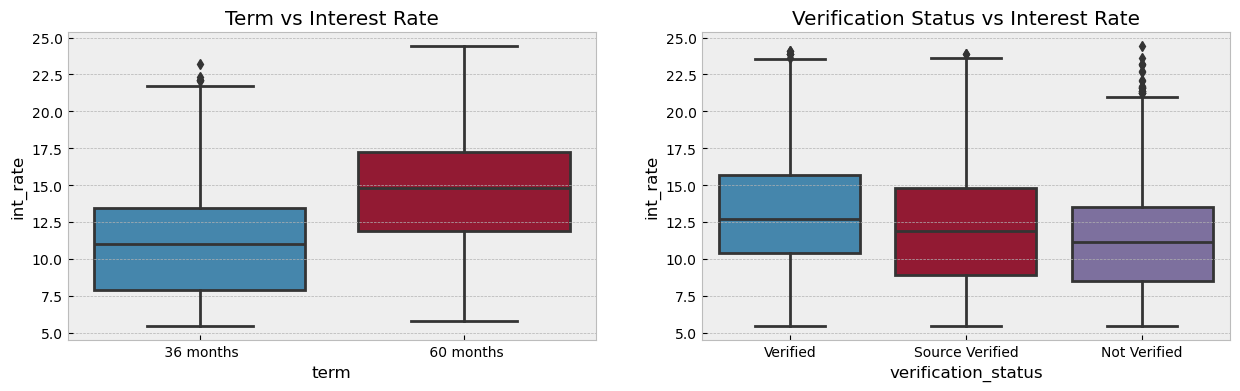

In [67]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="term", y="int_rate", data=loan_data_cleaned)
plt.title("Term vs Interest Rate")
plt.subplot(1,2,2)
sns.boxplot(x="verification_status", y="int_rate", data=loan_data_cleaned)
plt.title("Verification Status vs Interest Rate")
plt.show()

### Observation
- Analysis of term versus interest rate shows that loans with a 36-month term have lower interest rates, whereas those with a 60-month term carry higher interest rates.
- Regarding verification status and interest rates, verified borrowers tend to receive loans at higher interest rates compared to others.

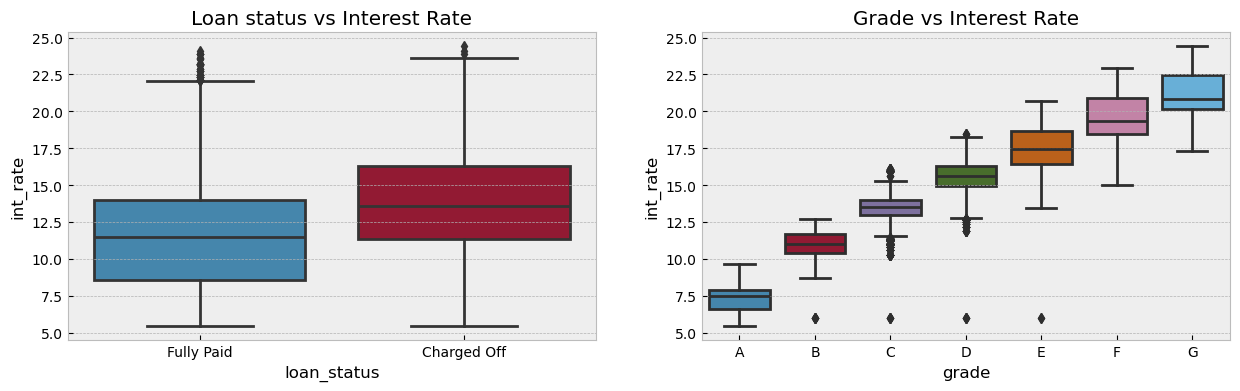

In [68]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="loan_status", y="int_rate", data=loan_data_cleaned)
plt.title("Loan status vs Interest Rate")
plt.subplot(1,2,2)
#arranging grade in alphabetically ascending order
grade_order = loan_data_cleaned["grade"].unique()
grade_order.sort()
sns.boxplot(x="grade", y="int_rate", order= grade_order, data=loan_data_cleaned)
plt.title("Grade vs Interest Rate")
plt.show()

### Observation
- Analysis of loan status versus interest rate indicates that borrowers with higher interest rates are more likely to default.
- Regarding grade versus interest rate, it is observed that as the grade decreases, the interest rate tends to increase.

Text(0.5, 1.0, 'Home Ownership vs Interest Rate')

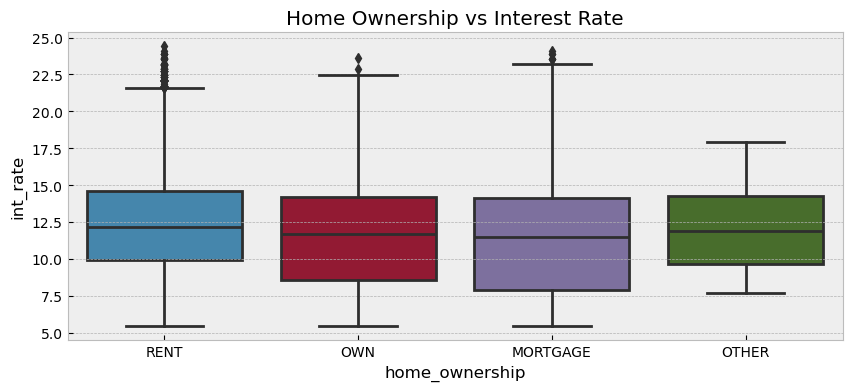

In [69]:
plt.figure(figsize=(10,4))
sns.boxplot(x="home_ownership", y="int_rate", data=loan_data_cleaned)
plt.title("Home Ownership vs Interest Rate")

### Observation
- Analysis of home ownership versus interest rate reveals that borrowers who are renting tend to receive higher interest rates. In contrast, borrowers who own their homes or have a mortgage typically secure loans at lower interest rates, likely due to the added security of property ownership.

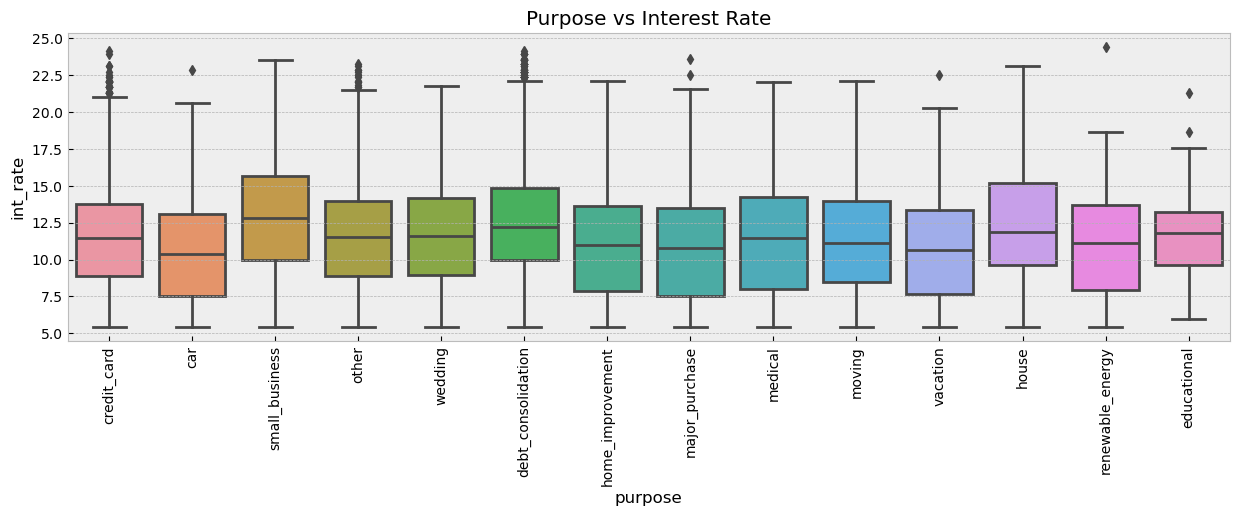

In [70]:
plt.figure(figsize=(15,4))
sns.boxplot(x="purpose", y="int_rate", data=loan_data_cleaned)
plt.title("Purpose vs Interest Rate")
plt.xticks(rotation=90)
plt.show()

### Observations
- Analysis of loan purpose versus interest rate shows that loans for small business, debt consolidation, and home improvement tend to have higher interest rates compared to other purposes.

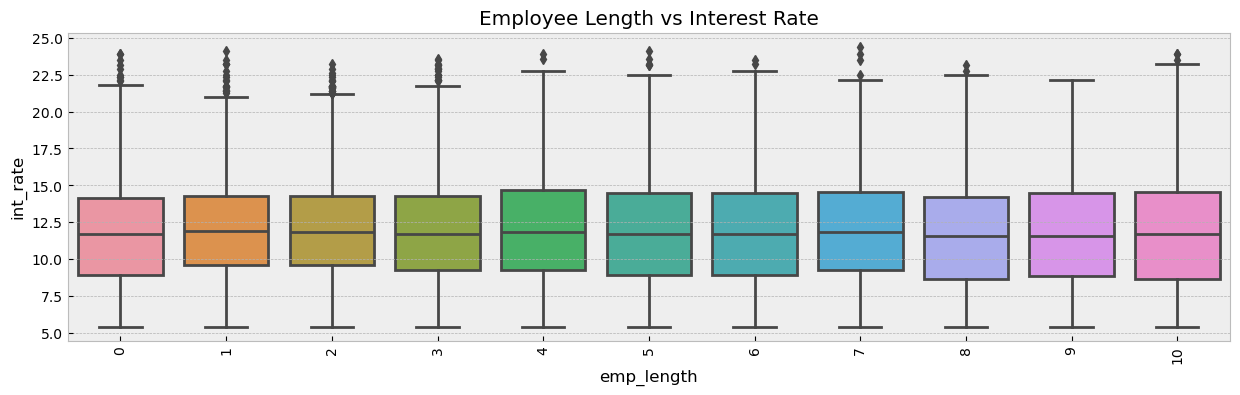

In [71]:
plt.figure(figsize=(15,4))
sns.boxplot(x="emp_length", y="int_rate", data=loan_data_cleaned)
plt.title("Employee Length vs Interest Rate")
plt.xticks(rotation=90)
plt.show()

### Observation
- There appears to be little to no correlation between employment length and interest rate.

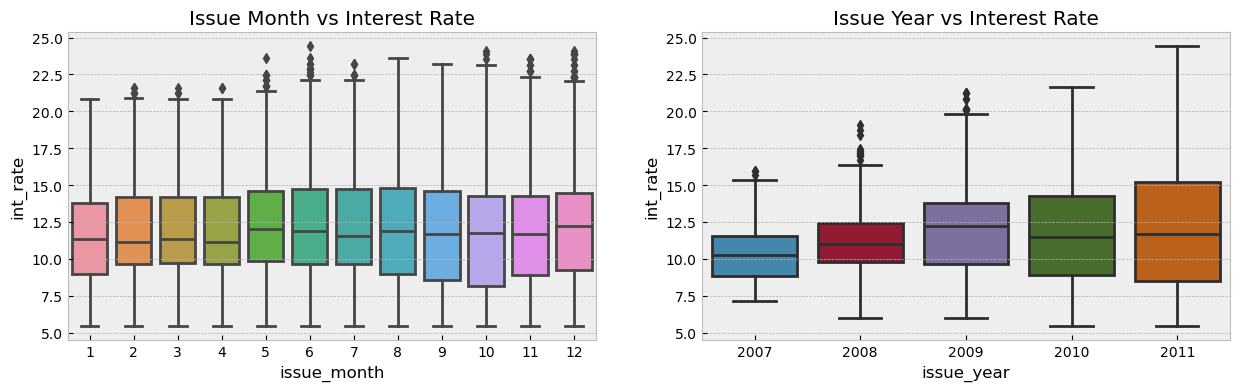

In [72]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="issue_month", y="int_rate", data=loan_data_cleaned)
plt.title("Issue Month vs Interest Rate")
plt.subplot(1,2,2)
sns.boxplot(x="issue_year", y="int_rate", data=loan_data_cleaned)
plt.title("Issue Year vs Interest Rate")
plt.show()

### Observation
- As the year goes on the rate of interest is getting diversed but the median remains same throughout the year.

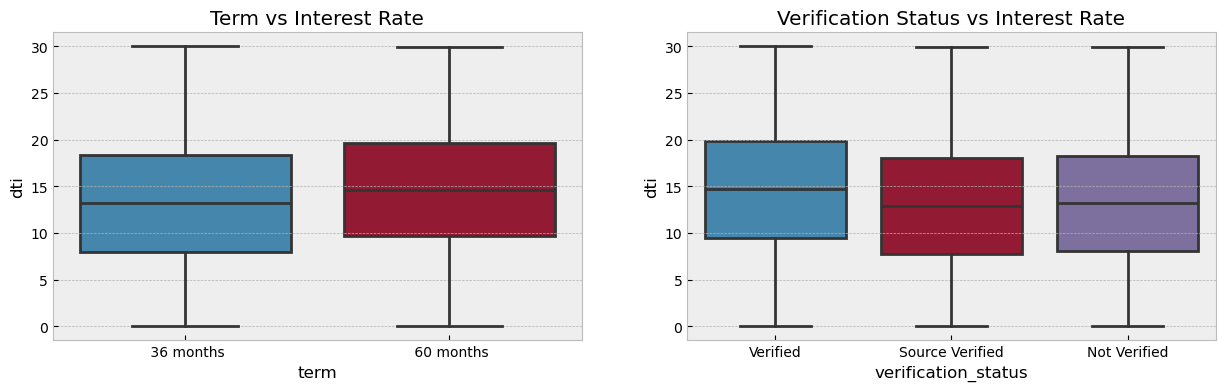

In [73]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="term", y="dti", data=loan_data_cleaned)
plt.title("Term vs Interest Rate")
plt.subplot(1,2,2)
sns.boxplot(x="verification_status", y="dti", data=loan_data_cleaned)
plt.title("Verification Status vs Interest Rate")
plt.show()

### Observation
- Analysis of interest rate versus term reveals that the debt-to-income (DTI) ratio is higher for borrowers with a 60-month loan tenure.
- Regarding verification status and DTI, it is observed that verified borrowers tend to have higher DTI ratios compared to others.

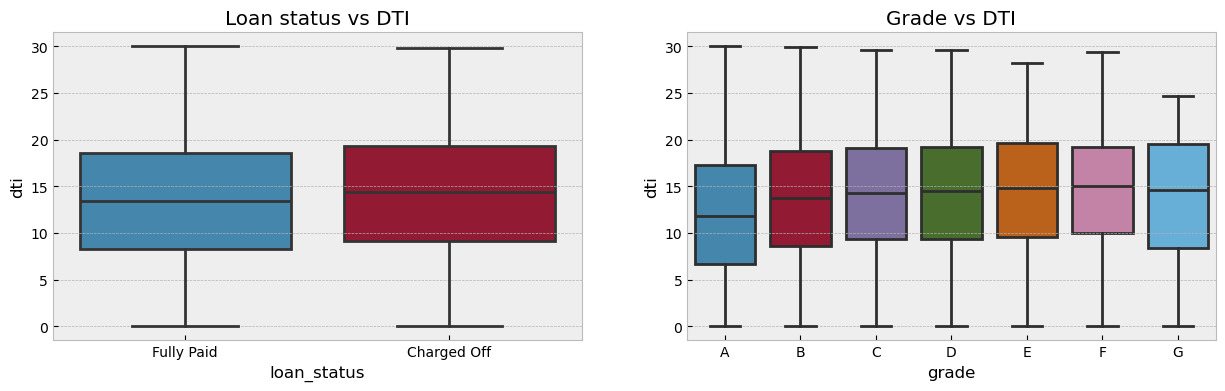

In [74]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="loan_status", y="dti", data=loan_data_cleaned)
plt.title("Loan status vs DTI")
plt.subplot(1,2,2)
#arranging grade in alphabetically ascending order
grade_order = loan_data_cleaned["grade"].unique()
grade_order.sort()
sns.boxplot(x="grade", y="dti", order= grade_order, data=loan_data_cleaned)
plt.title("Grade vs DTI")
plt.show()

##### Observations
- Most of the charged off borrowers are having high dti ratio.
- As grade decreases dti ratio is increasing.

Text(0.5, 1.0, 'Home Ownership vs DTI')

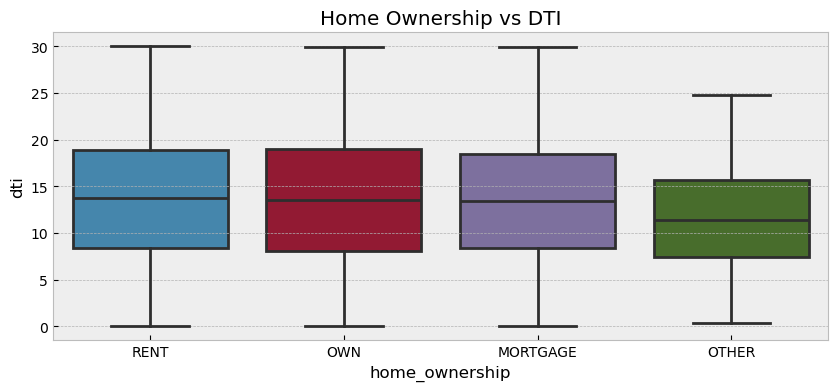

In [75]:
plt.figure(figsize=(10,4))
sns.boxplot(x="home_ownership", y="dti", data=loan_data_cleaned)
plt.title("Home Ownership vs DTI")

##### Observations
- In dti vs home ownership variable we can say that, the borrower with own and rent home status are having high dti ratio than others.

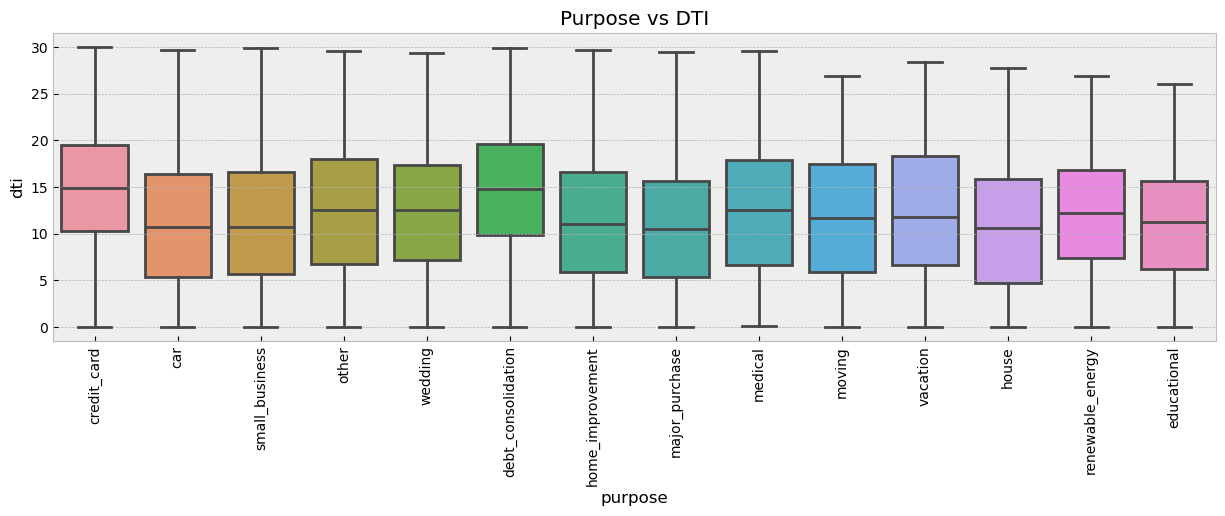

In [76]:
plt.figure(figsize=(15,4))
sns.boxplot(x="purpose", y="dti", data=loan_data_cleaned)
plt.title("Purpose vs DTI")
plt.xticks(rotation=90)
plt.show()

##### Observations
- In purpose vs dti variable we can say that, the borrower who takes loan for the purpose of debt consolidation and credit card are having high dti ratio than others.

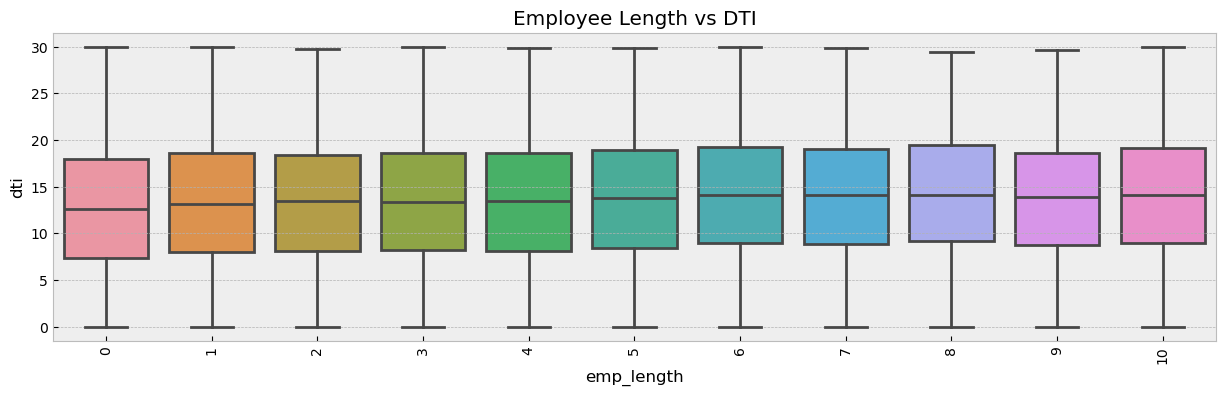

In [77]:
plt.figure(figsize=(15,4))
sns.boxplot(x="emp_length", y="dti", data=loan_data_cleaned)
plt.title("Employee Length vs DTI")
plt.xticks(rotation=90)
plt.show()

##### Observations
- There is no much relation between employee length and dti ratio.

In [78]:
#grouping annual income bin and loan status
annual_inc_bin_vs_loan_status = loan_data_cleaned.groupby(['annual_inc_bin', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
#creating "Total" variable
annual_inc_bin_vs_loan_status['Total'] = annual_inc_bin_vs_loan_status['Charged Off'] + annual_inc_bin_vs_loan_status['Fully Paid']
#calculating chargedoff proportion
annual_inc_bin_vs_loan_status['Chargedoff_Proportion'] = annual_inc_bin_vs_loan_status['Charged Off'] / annual_inc_bin_vs_loan_status['Total']
#sorting the chargedoff proportion in descending order
annual_inc_bin_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_bin,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,187,809,996,0.187751
1,20000-40000,1415,6696,8111,0.174454
2,40000-60000,1671,9320,10991,0.152033
3,60000-80000,1001,6502,7503,0.133413
4,80000 +,906,7118,8024,0.112911


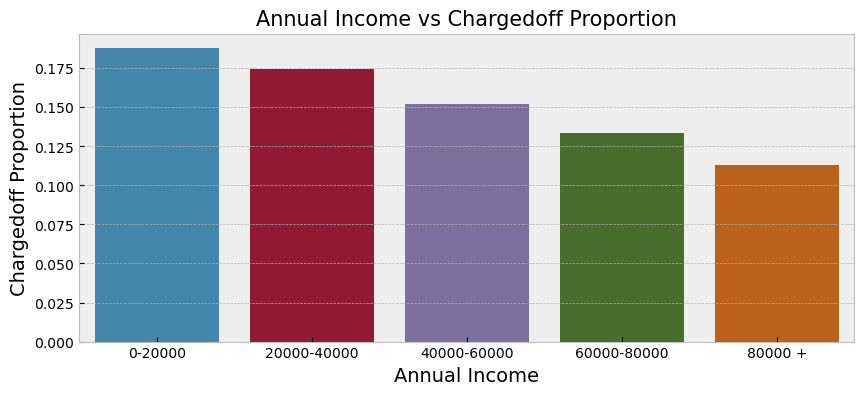

In [79]:
fig, ax1 = plt.subplots(figsize=(10, 4))
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15)
#barplot
ax1=sns.barplot(x='annual_inc_bin', y='Chargedoff_Proportion', data=annual_inc_bin_vs_loan_status)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
ax1.set_xlabel('Annual Income',fontsize=14)
plt.show()

##### Observations
- From above chart we can say that, as annual income is increasing charged off proportion is decreasing.
- So highest charged off proportion are in the range 0 to 20k annual income.

In [80]:
purpose_vs_loan_status = loan_data_cleaned.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan_status['Total'] = purpose_vs_loan_status['Charged Off'] + purpose_vs_loan_status['Fully Paid']
purpose_vs_loan_status['Chargedoff_Proportion'] = purpose_vs_loan_status['Charged Off'] / purpose_vs_loan_status['Total']
purpose_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,440,1144,1584,0.277778
10,renewable_energy,17,70,87,0.195402
5,house,55,270,325,0.169231
3,educational,51,251,302,0.168874
9,other,564,2970,3534,0.159593
7,medical,98,517,615,0.159350
8,moving,82,443,525,0.156190
2,debt_consolidation,2587,14342,16929,0.152815
12,vacation,49,288,337,0.145401
4,home_improvement,303,2169,2472,0.122573


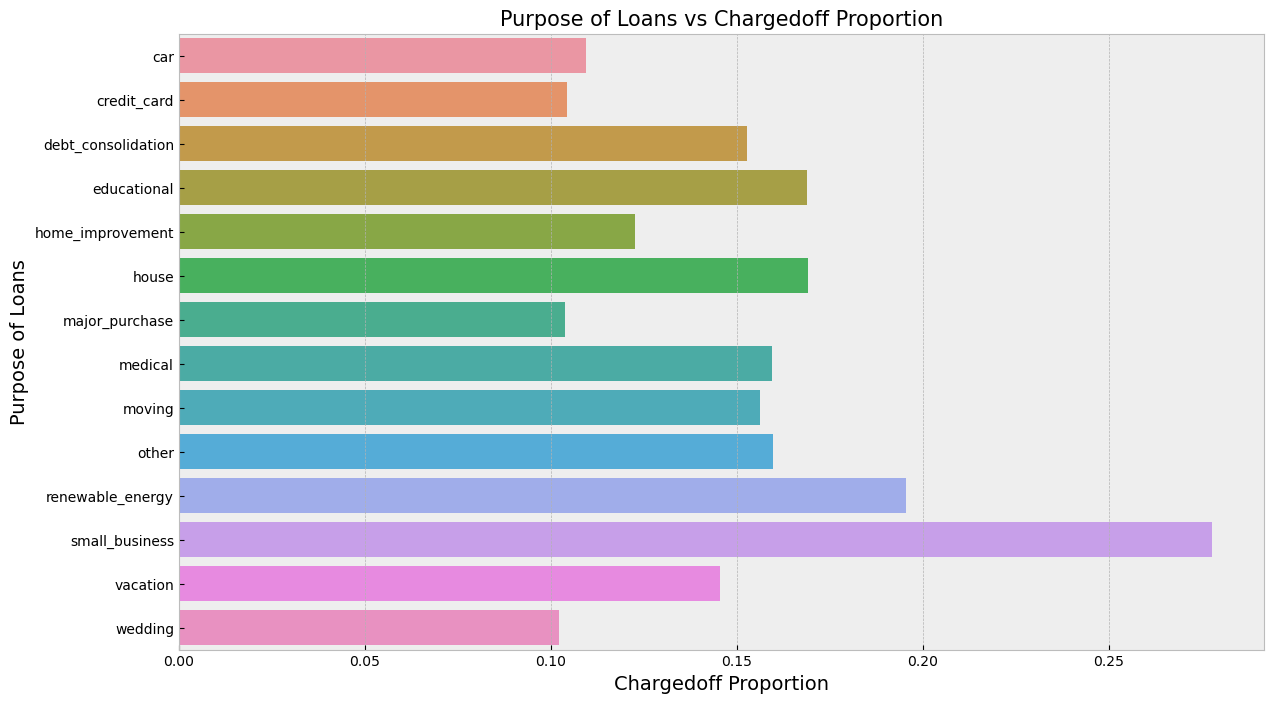

In [81]:
fig, ax1 = plt.subplots(figsize=(14, 8))
ax1.set_title('Purpose of Loans vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_vs_loan_status)
ax1.set_ylabel('Purpose of Loans',fontsize=14)
ax1.set_xlabel('Chargedoff Proportion',fontsize=14)
plt.show()

##### Observations
- From above we can say that, the borrower who take loan for the purpose of small-business has the maximum charged off proportion.

In [82]:
grade_vs_loan_status = loan_data_cleaned.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan_status['Total'] = grade_vs_loan_status['Charged Off'] + grade_vs_loan_status['Fully Paid']
grade_vs_loan_status['Chargedoff_Proportion'] = grade_vs_loan_status['Charged Off'] / grade_vs_loan_status['Total']
grade_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,grade,Charged Off,Fully Paid,Total,Chargedoff_Proportion
6,G,92,168,260,0.353846
5,F,280,585,865,0.323699
4,E,641,1755,2396,0.267529
3,D,1046,3675,4721,0.221563
2,C,1263,6049,7312,0.172730
1,B,1308,9489,10797,0.121145
0,A,550,8724,9274,0.059306


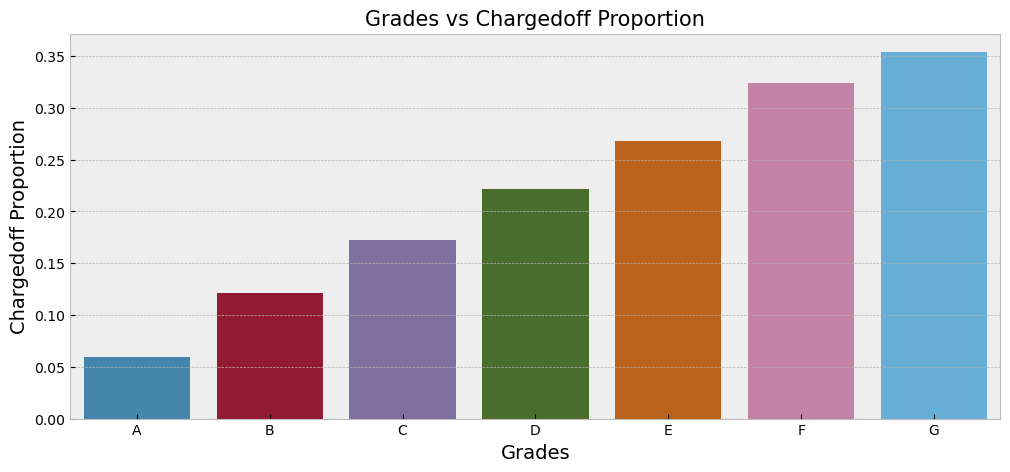

In [83]:
fig, ax1 = plt.subplots(figsize=(12, 5))
ax1.set_title('Grades vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan_status)
ax1.set_xlabel('Grades',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

##### Observations
- From above chart we can say that, as grades are decreasing charged off proportion is increasing.

In [84]:
int_rate_bin_vs_loan_status = loan_data_cleaned.groupby(['int_rate_bin', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
int_rate_bin_vs_loan_status['Total'] = int_rate_bin_vs_loan_status['Charged Off'] + int_rate_bin_vs_loan_status['Fully Paid']
int_rate_bin_vs_loan_status['Chargedoff_Proportion'] = int_rate_bin_vs_loan_status['Charged Off'] / int_rate_bin_vs_loan_status['Total']
int_rate_bin_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,int_rate_bin,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,15-20,1648,4960,6608,0.249395
1,10-15,2525,14476,17001,0.148521
0,5-10,746,10607,11353,0.065710


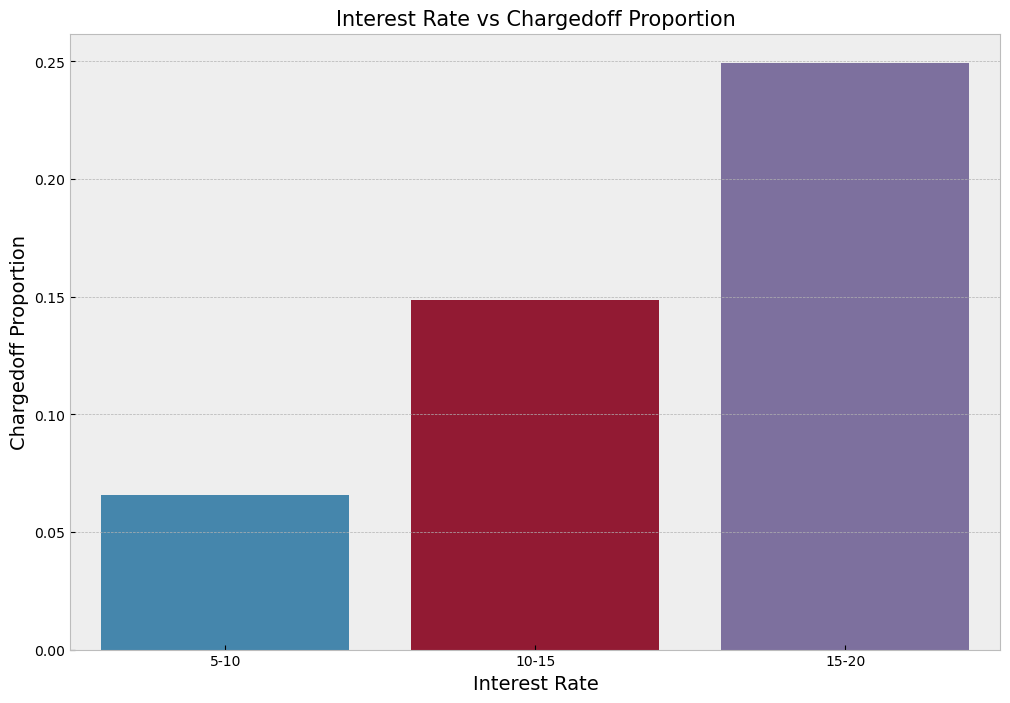

In [85]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='int_rate_bin', y='Chargedoff_Proportion', data=int_rate_bin_vs_loan_status)
ax1.set_xlabel('Interest Rate',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

##### Observations
- As interest rate are increasing, charged off proportion is also increasing.
- The borrower who takes loan at the interest rate of 15 to 20 are getting mostly charged off.

In [86]:
emp_length_vs_loan_status = loan_data_cleaned.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emp_length_vs_loan_status['Total'] = emp_length_vs_loan_status['Charged Off'] + emp_length_vs_loan_status['Fully Paid']
emp_length_vs_loan_status['Chargedoff_Proportion'] = emp_length_vs_loan_status['Charged Off'] / emp_length_vs_loan_status['Total']
emp_length_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,emp_length,Charged Off,Fully Paid,Total,Chargedoff_Proportion
10,10,1269,6623,7892,0.160796
7,7,252,1389,1641,0.153565
1,1,446,2595,3041,0.146662
5,5,439,2603,3042,0.144313
8,8,193,1151,1344,0.143601
0,0,613,3703,4316,0.142030
6,6,293,1780,2073,0.141341
3,3,537,3289,3826,0.140355
4,4,441,2755,3196,0.137985
2,2,547,3553,4100,0.133415


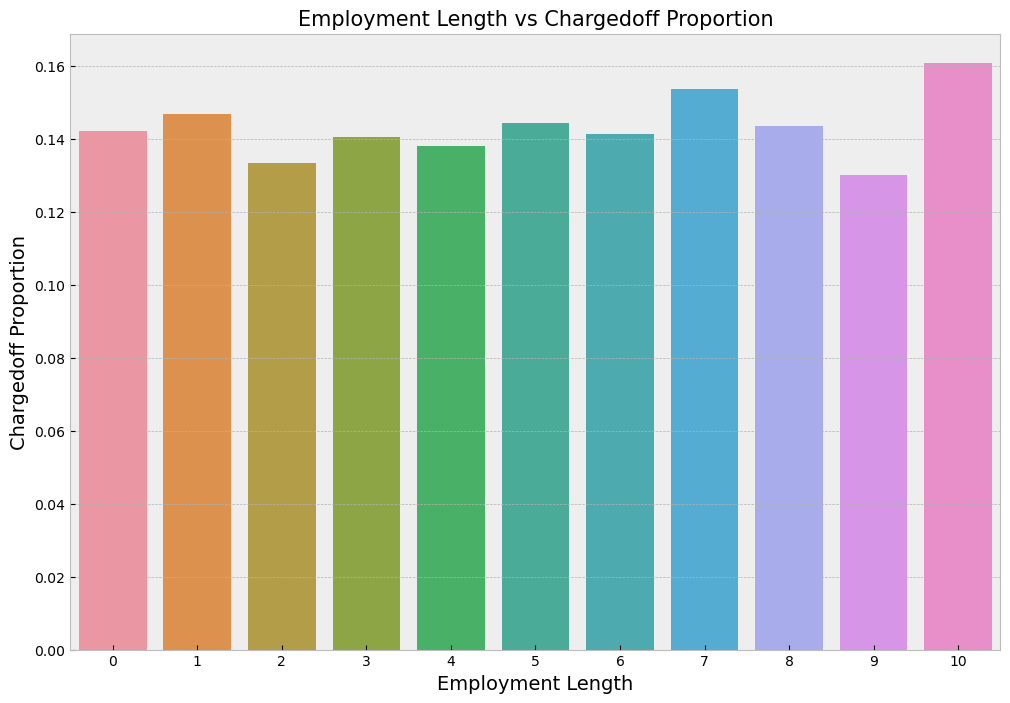

In [87]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Employment Length vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='emp_length', y='Chargedoff_Proportion', data=emp_length_vs_loan_status)
ax1.set_xlabel('Employment Length',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

##### Observations
- The borrowers whose employee length is less than 1 year, 1 year and 10+ year are mostly getting charged off.

In [88]:
addr_state_vs_loan_status = loan_data_cleaned.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
addr_state_vs_loan_status['Total'] = addr_state_vs_loan_status['Charged Off'] + addr_state_vs_loan_status['Fully Paid']
addr_state_vs_loan_status['Chargedoff_Proportion'] = addr_state_vs_loan_status['Charged Off'] / addr_state_vs_loan_status['Total']
addr_state_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,addr_state,Charged Off,Fully Paid,Total,Chargedoff_Proportion
28,NE,3.0,2.0,5.0,0.600000
32,NV,96.0,346.0,442.0,0.217195
13,ID,1.0,4.0,5.0,0.200000
0,AK,13.0,56.0,69.0,0.188406
40,SD,11.0,49.0,60.0,0.183333
9,FL,462.0,2106.0,2568.0,0.179907
11,HI,28.0,128.0,156.0,0.179487
31,NM,29.0,144.0,173.0,0.167630
24,MO,103.0,523.0,626.0,0.164537
30,NJ,268.0,1380.0,1648.0,0.162621


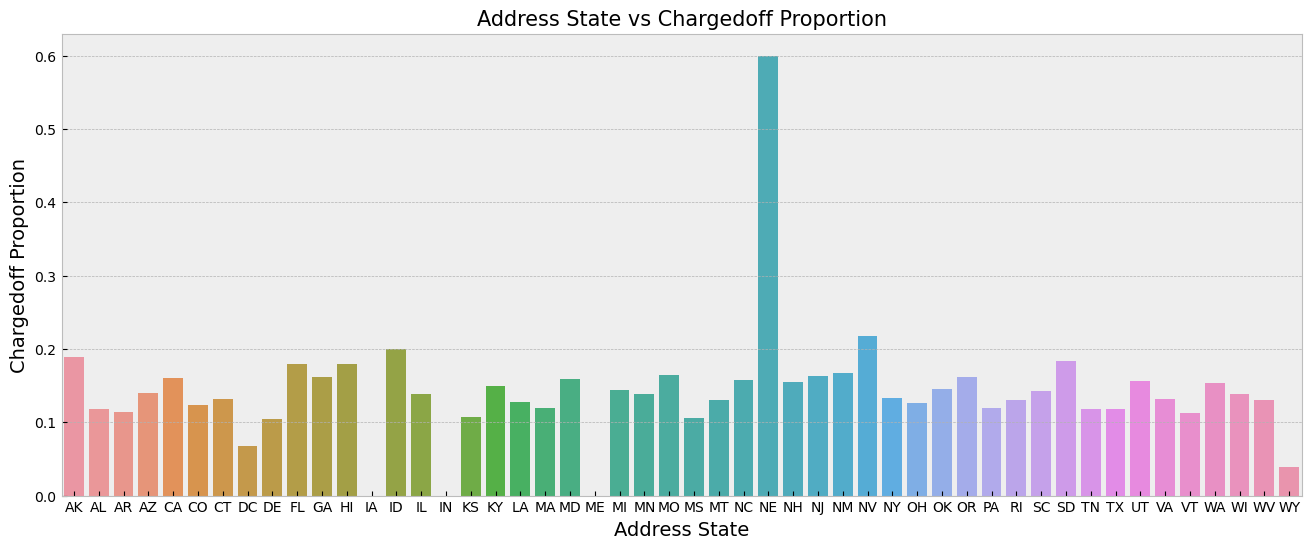

In [89]:
fig, ax1 = plt.subplots(figsize=(16, 6))
ax1.set_title('Address State vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='addr_state', y='Chargedoff_Proportion', data=addr_state_vs_loan_status)
ax1.set_xlabel('Address State',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

##### Observations
- The borrowers who are from NV, AK, TN state are mostly getting charged off.

In [90]:
verification_status_vs_loan_status = loan_data_cleaned.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verification_status_vs_loan_status['Total'] = verification_status_vs_loan_status['Charged Off'] + verification_status_vs_loan_status['Fully Paid']
verification_status_vs_loan_status['Chargedoff_Proportion'] = verification_status_vs_loan_status['Charged Off'] / verification_status_vs_loan_status['Total']
verification_status_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,verification_status,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,Verified,1850,8956,10806,0.171201
1,Source Verified,1333,7643,8976,0.148507
0,Not Verified,1997,13846,15843,0.126049


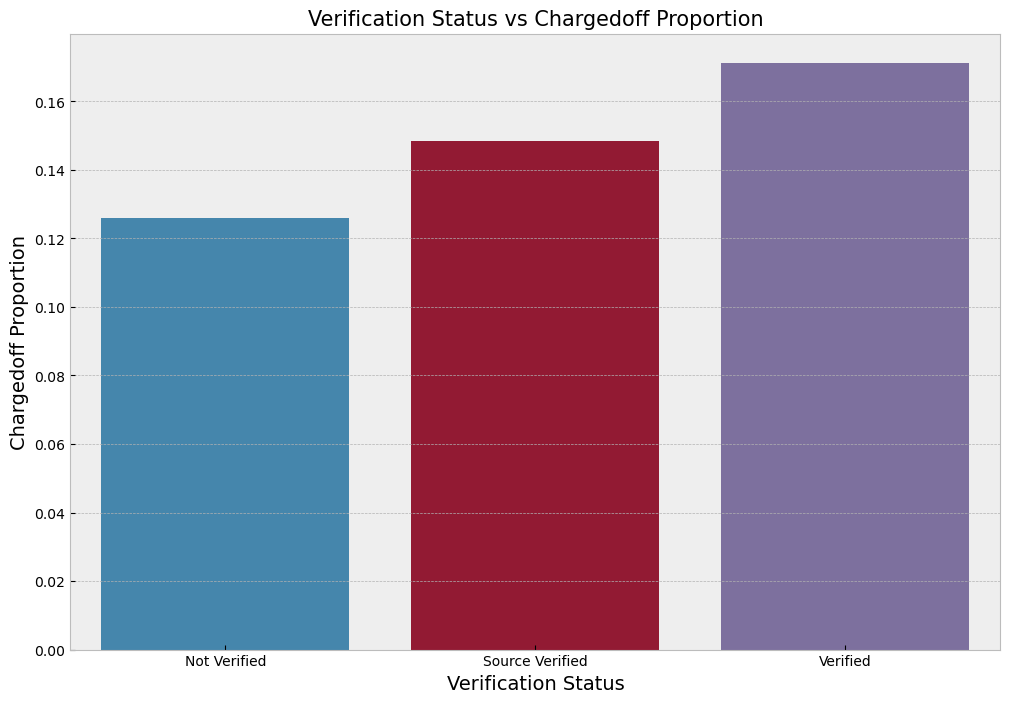

In [91]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Verification Status vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='verification_status', y='Chargedoff_Proportion', data=verification_status_vs_loan_status)
ax1.set_xlabel('Verification Status',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

# Multivariate Analysis

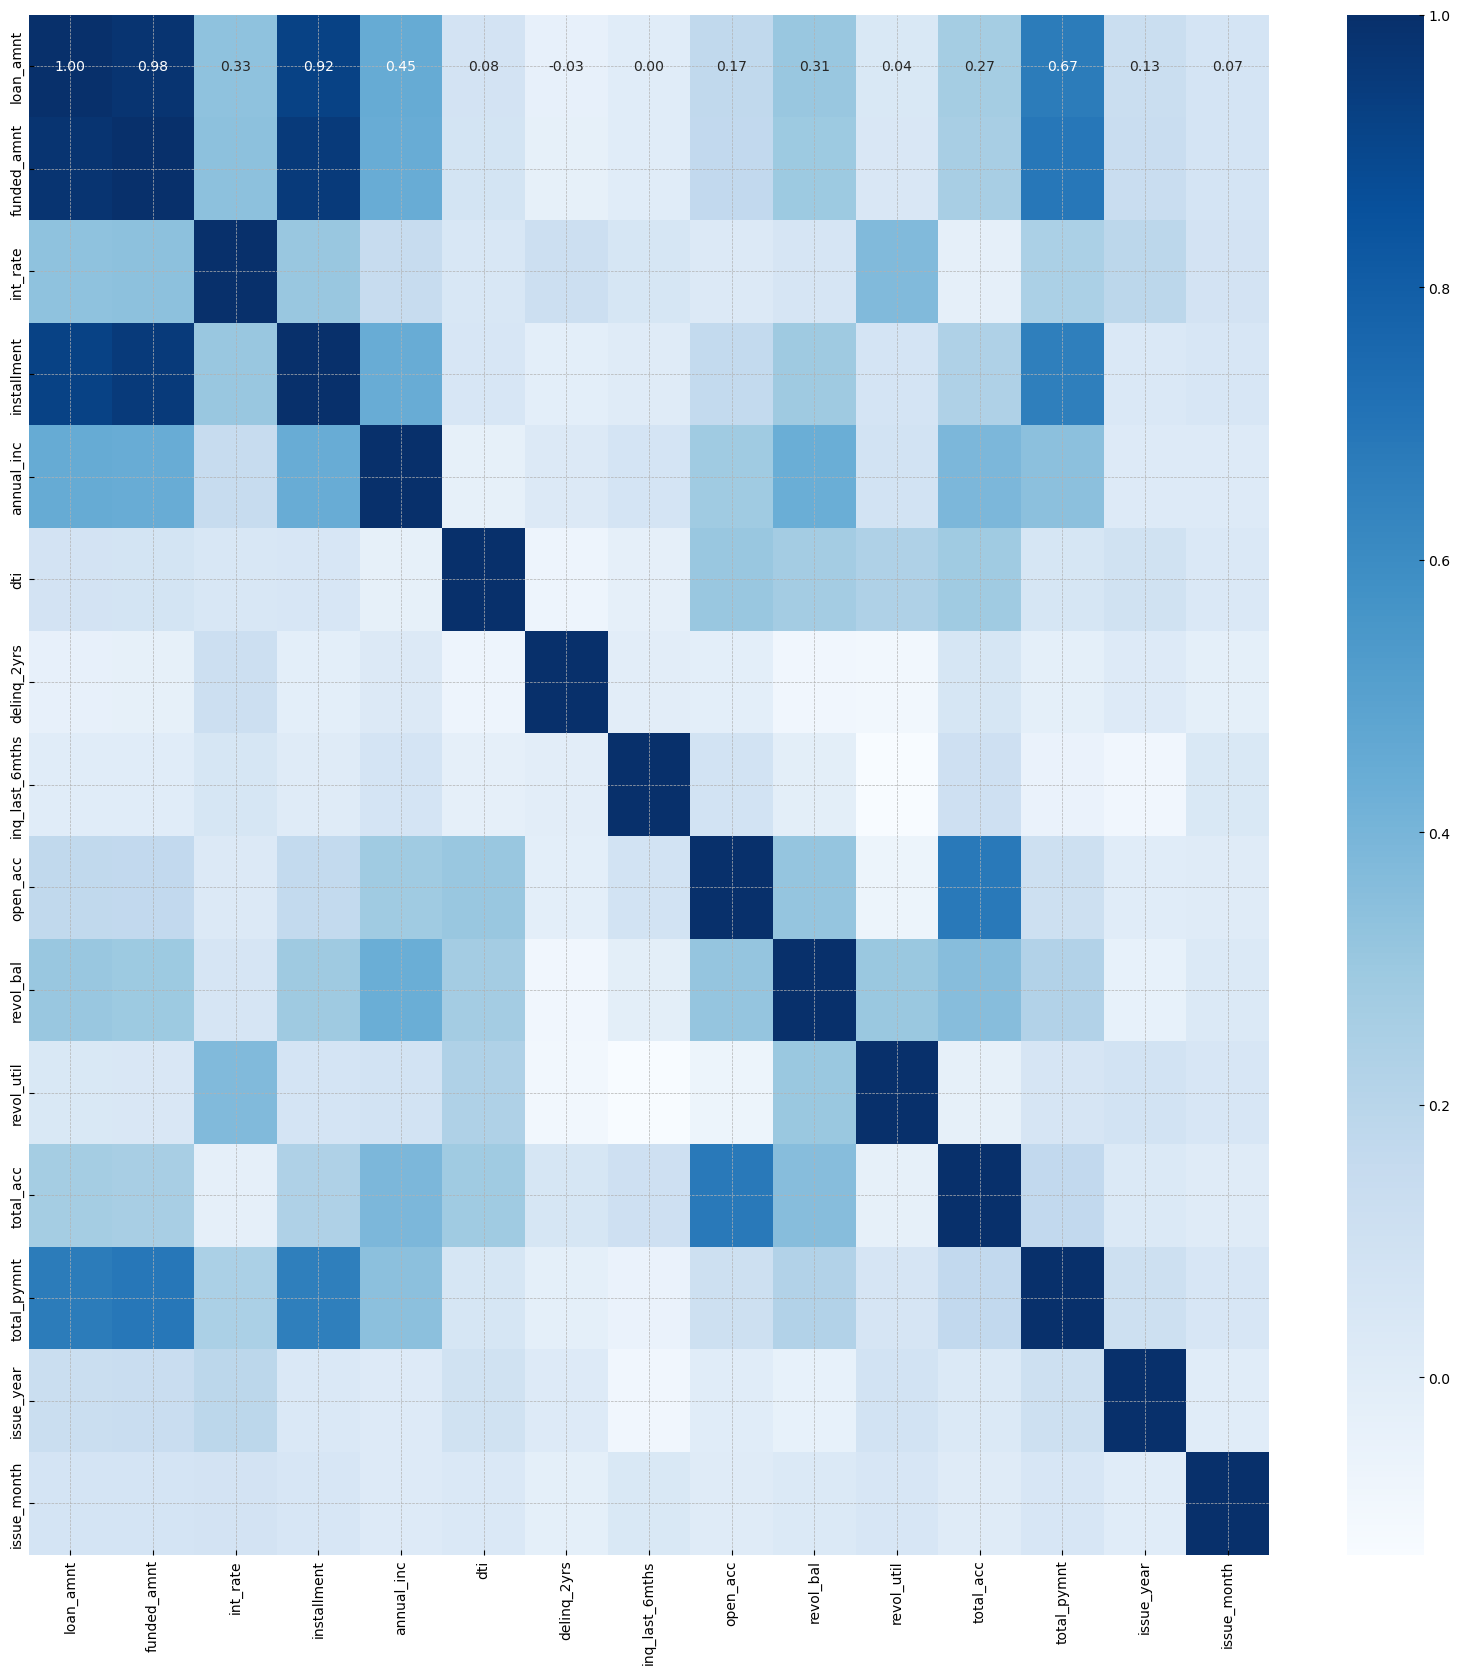

In [92]:
loan_filtered = loan_data_cleaned[(loan_data_cleaned.loan_status =='Fully Paid') | (loan_data_cleaned.loan_status =='Charged Off')]
loan_filtered.loan_status.value_counts()

#We can get rid of loan_status as will as its nominal we can add it as column
dummy = pd.get_dummies(loan_filtered.loan_status)
loan_filtered = pd.concat([loan_filtered,dummy] , axis=1)
# loan_filtered.rename(columns={'Charged Off':'chargedoff','Fully Paid':'fullypaid'})
loan_filtered = loan_filtered.drop(['Charged Off','Fully Paid'], axis=1)
# loan_filtered = loan_filtered.rename(columns={'Charged Off':'chargedoff','Fully Paid':'fullypaid'})
loan_filtered = pd.concat([loan_filtered,dummy] , axis=1)
#rename the columns
loan_filtered = loan_filtered.rename(columns={'Charged Off':'chargedoff','Fully Paid':'fullypaid'})
loan_filtered.head()

# Categorical Varibales considered are below
# loan_filtered.select_dtypes('object')
corr_cf=loan_filtered[loan_filtered.chargedoff ==1]
nominal_vars = ['home_ownership', 'verification_status', 'purpose', 'term','grade']
dummy = pd.get_dummies(corr_cf[nominal_vars] )
dummy.head(5)

#adding those columns in loan_filter dataframe
corr_cf = pd.concat([corr_cf,dummy] , axis=1)
corr_cf = corr_cf.drop(nominal_vars , axis=1)
corr_cf.columns

# Loan status not required as its for "charged off" only
corr_cf =corr_cf.drop(['chargedoff','fullypaid'], axis=1)


plt.figure(figsize=(20, 20))
corr_cf_numeric = corr_cf.select_dtypes(include=['float64', 'int64'])
# Compute the correlation matrix
corr = corr_cf_numeric.corr()

# Plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap="Blues", annot=True, fmt=".2f")

# Show the plot
plt.show()

### Observation
- Loan amount, funded amount, funded amount invested, and installment are strongly correlated with one another.
- Annual income and debt-to-income (DTI) ratio are negatively correlated.
- The debt-to-income ratio represents the percentage of a borrower's monthly gross income that is allocated to debt payments. This implies that when annual income is low, debt tends to be higher, and vice versa.

# Recommendations

### Based on the analysis, the probability of defaulting is higher for borrowers who:
- Take loans with a term of 60 months.
- Have a loan status of "Verified," as they tend to take out larger loans with 60-month terms.
- Receive loans with an interest rate between 15% and 20%.
- Take loans for the purpose of starting a small business.
- Have lower credit grades, particularly F and G.
- Have home ownership status as "Rent" and take loans for debt consolidation.
- Have a low annual income (between 0 and 20,000).
- Take loan amounts in the range of 0 to 14,000.
- are verified loan applicants, but it’s just a marginal loss compared to non-verified ones. Though its not a key factor, but needs to check the loan screening sources.
